$$
\frac{\sqrt{A}}{\sigma}\pi\frac{\cosh\Bigl(\frac{\sqrt{A}}{\sigma}(\pi-|\frac{2\pi k}{N}|)\Bigr)}{\sinh(\frac{\sqrt{A}}{\sigma}\pi)}
$$

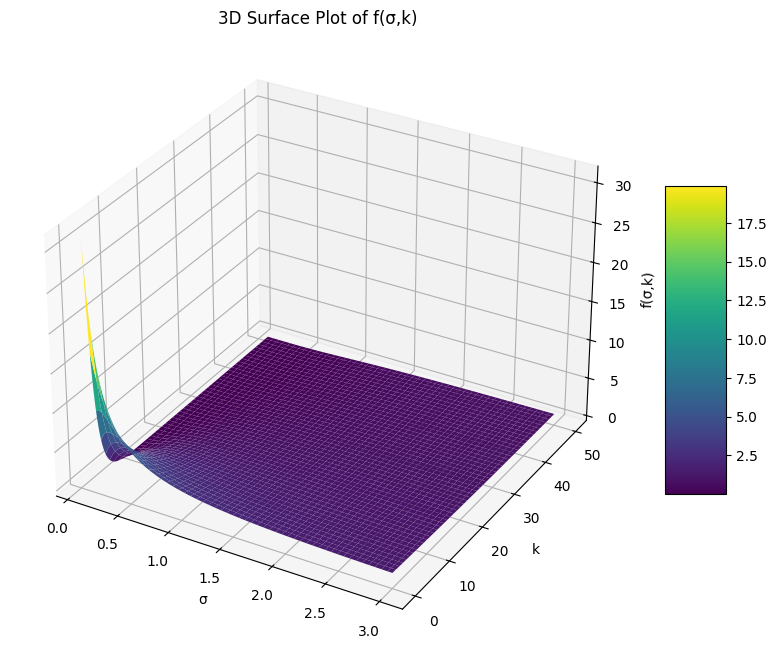

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necessary for 3D plotting

# Parameters: Feel free to modify these values.
A = 1
N = 100

# Define ranges for sigma and k.
sigma_range = np.linspace(0.1, 3, 200)  # sigma values (avoid sigma=0 to prevent division by zero)
k_range = np.linspace(0, N/2, 200)        # k values from 0 to N/2 to capture the interesting symmetry

# Create a 2D grid for sigma and k.
SIGMA, K = np.meshgrid(sigma_range, k_range)

# Evaluate the function:
# f(σ, k) = (π / σ) * cosh((π - |2π*k/N|) / σ) / sinh(π/σ)
f = (np.pi / SIGMA) * np.cosh((np.pi - np.abs(2 * np.pi * K / N)) / SIGMA) / np.sinh(np.pi / SIGMA)

# Create a 3D surface plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(SIGMA, K, f, cmap='viridis', edgecolor='none')
ax.set_xlabel('σ')
ax.set_ylabel('k')
ax.set_zlabel('f(σ,k)')
ax.set_title('3D Surface Plot of f(σ,k)')

# Add a color bar to map values to colors.
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

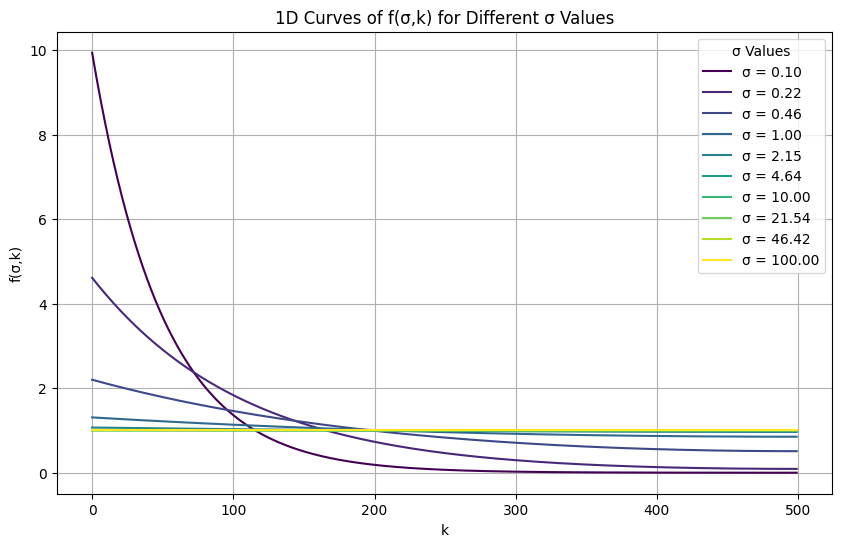

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (feel free to adjust)
A = 0.1
N = 1000

# Define the range for k
# k_vals = np.linspace(0, N/2, 400)
k_vals = np.arange(0, N/2, 1)

# Choose a set of sigma values to plot (10 different curves in this example)
sigma_values = np.logspace(np.log10(0.1), np.log10(100), 10)

# Create a colormap to assign a different color for each sigma
cmap = plt.get_cmap("viridis", len(sigma_values))

plt.figure(figsize=(10, 6))
for i, sigma in enumerate(sigma_values):
    # f(σ,k) = (π / σ) * cosh((π - |2π*k/N|) / σ) / sinh(π/σ)
    f_vals = (np.pi * np.sqrt(A) / sigma) * np.cosh((np.pi - np.abs(2 * np.pi * k_vals / N)) * np.sqrt(A) / sigma) / np.sinh(np.pi * np.sqrt(A) / sigma)
    plt.plot(k_vals, f_vals, color=cmap(i), label=f"σ = {sigma:.2f}")

# plt.yscale("log")
plt.xlabel("k")
plt.ylabel("f(σ,k)")
plt.title("1D Curves of f(σ,k) for Different σ Values")
plt.legend(title="σ Values")
plt.grid(True)
plt.show()

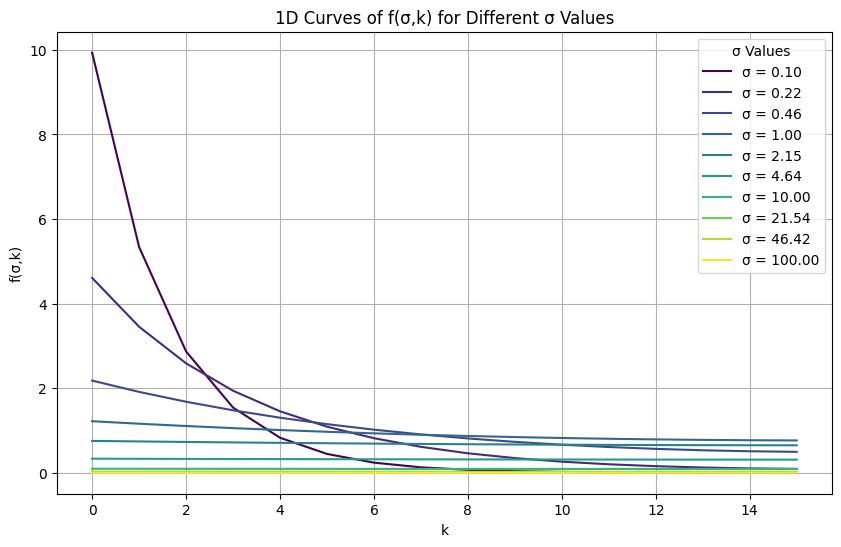

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (feel free to adjust)
A = 0.1
N = 32

# Define the range for k
# k_vals = np.linspace(0, N/2, 400)
k_vals = np.arange(0, N/2, 1)

# Choose a set of sigma values to plot (10 different curves in this example)
sigma_values = np.logspace(np.log10(0.1), np.log10(100), 10)

# Create a colormap to assign a different color for each sigma
cmap = plt.get_cmap("viridis", len(sigma_values))
lambda_0 = 10
plt.figure(figsize=(10, 6))
for i, sigma in enumerate(sigma_values):
    DC_shift = - sigma ** 2 / (sigma ** 2 + lambda_0)
    # f(σ,k) = (π / σ) * cosh((π - |2π*k/N|) / σ) / sinh(π/σ)
    f_vals = (np.pi * np.sqrt(A) / sigma) * np.cosh((np.pi - np.abs(2 * np.pi * k_vals / N)) * np.sqrt(A) / sigma) / np.sinh(np.pi * np.sqrt(A) / sigma)
    plt.plot(k_vals, f_vals + DC_shift, color=cmap(i), label=f"σ = {sigma:.2f}")

# plt.yscale("log")
plt.xlabel("k")
plt.ylabel("f(σ,k)")
plt.title("1D Curves of f(σ,k) for Different σ Values")
plt.legend(title="σ Values")
plt.grid(True)
plt.show()

$$
-\frac{\sigma^{2}}{\sigma^{2}+\lambda_{0}}+\frac{\sqrt{A}\pi}{\sigma}\coth\Bigl(\frac{\sqrt{A}\pi}{\sigma}\Bigr)
$$

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_2511/56735009.py:11: RuntimeWarning: overflow encountered in cosh
  return cosh(x) / sinh(x)
/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_2511/56735009.py:11: RuntimeWarning: overflow encountered in sinh
  return cosh(x) / sinh(x)
/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_2511/56735009.py:11: RuntimeWarning: invalid value encountered in divide
  return cosh(x) / sinh(x)


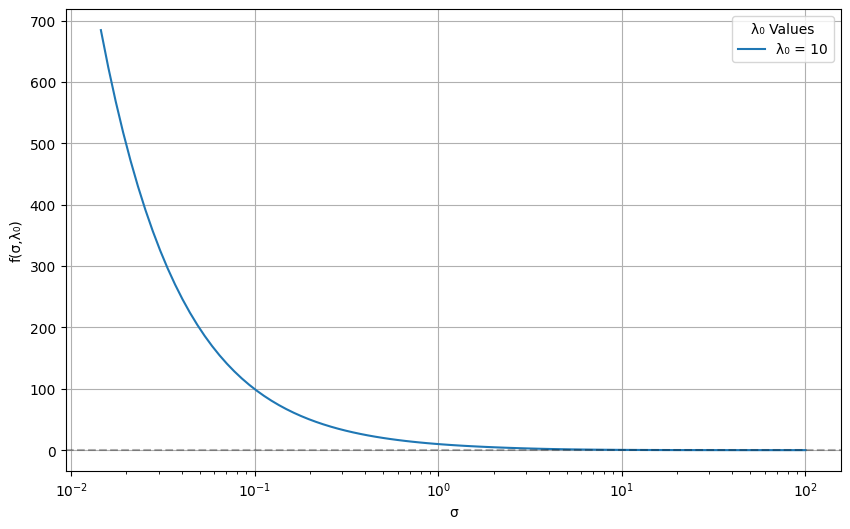

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sinh, cosh, tanh
# Parameters
A = 10
lambda_0_values = [0.001, 0.01, 0.1, 1, 10, 100]  # Different values of lambda_0 to plot
lambda_0_values = [10]  # Different values of lambda_0 to plot
# Define the range for sigma
sigma_vals = np.logspace(-2, 2, 100)  # From 0.1 to 100, logarithmically spaced
def coth(x):
    return cosh(x) / sinh(x)

# Define the function from the formula
def f_lambda(A, sigma, lambda_0):
    term1 = - sigma**2 / (sigma**2 + lambda_0)
    term2 = (np.sqrt(A) * np.pi / sigma) * coth(np.sqrt(A) * np.pi / sigma)
    return term1 + term2

# Create a colormap for different lambda_0 values
cmap = plt.get_cmap("tab10", len(lambda_0_values))

plt.figure(figsize=(10, 6))

for i, lambda_0 in enumerate(lambda_0_values):
    f_vals = f_lambda(A, sigma_vals, lambda_0)
    plt.plot(sigma_vals, f_vals, color=cmap(i), label=f"λ₀ = {lambda_0}")

plt.xscale("log")  # Logarithmic scale for sigma
plt.xlabel("σ")
plt.ylabel("f(σ,λ₀)")
# plt.title("Plot of $-\\frac{\\sigma^{2}}{\\sigma^{2}+\\lambda_{0}}+\\frac{\\sqrt{A}\\pi}{\\sigma}\\coth\\Bigl(\\frac{\\sqrt{A}\\pi}{\\sigma}\\Bigr)$")
plt.legend(title="λ₀ Values")
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)  # Add horizontal line at y=0
plt.show()

### Circulant matrix case

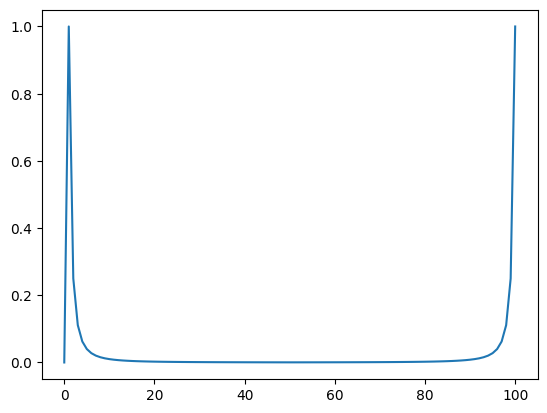

In [42]:
N = 101
lambda_0 = 0
k_vec = np.arange(1, N//2+1)
lambda_vec = np.zeros(N)
lambda_vec[0] = lambda_0
lambda_vec[k_vec] = 1 / k_vec**2
lambda_vec[N//2+1:] = 1 / k_vec[::-1]**2
plt.plot(lambda_vec)
plt.show()

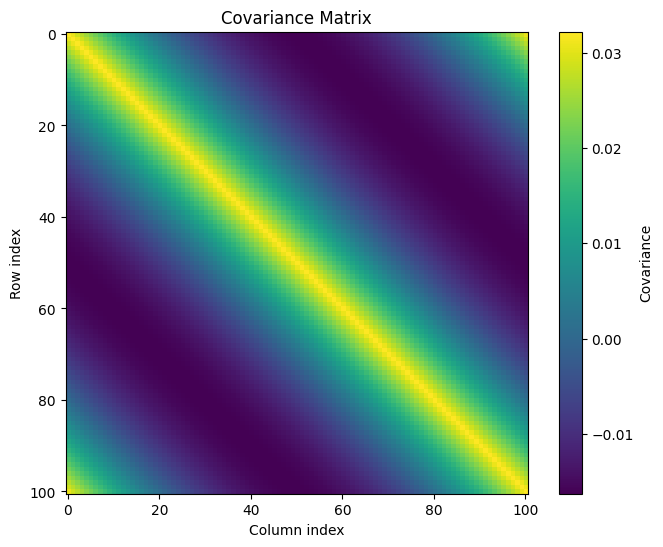

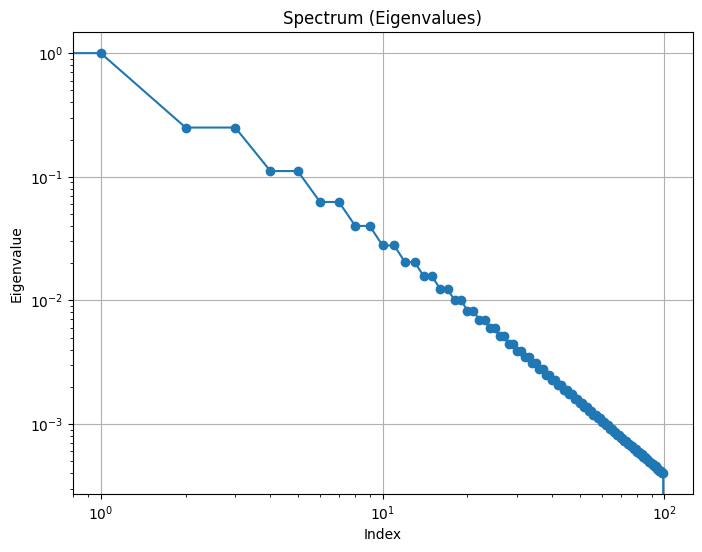

In [77]:

N = 101
lambda_0 = 0
k_vec = np.arange(1, N//2+1)
lambda_vec = np.zeros(N)
lambda_vec[0] = lambda_0
lambda_vec[k_vec] = 1 / k_vec**2
lambda_vec[N//2+1:] = 1 / k_vec[::-1]**2

# Create DFT matrix
N = len(lambda_vec)
F = np.fft.fft(np.eye(N)) / np.sqrt(N)
# Create diagonal matrix with eigenvalues (lambda_vec)
Lambda = np.diag(lambda_vec)
# Convert to covariance matrix using C = F* Λ F
# where F* is the conjugate transpose of F
covariance_matrix = F.conj().T @ Lambda @ F
eigenvalues = np.linalg.eigvalsh(covariance_matrix)

# Display the first few rows/columns of the covariance matrix
plt.figure(figsize=(8, 6))
plt.imshow(np.real(covariance_matrix[:, :]), cmap='viridis')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix')
plt.xlabel('Column index')
plt.ylabel('Row index')
plt.show()
# Also show the full spectrum (eigenvalues)
plt.figure(figsize=(8, 6))
plt.loglog(eigenvalues[::-1], 'o-', label='Eigenvalues')
plt.title('Spectrum (Eigenvalues)')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

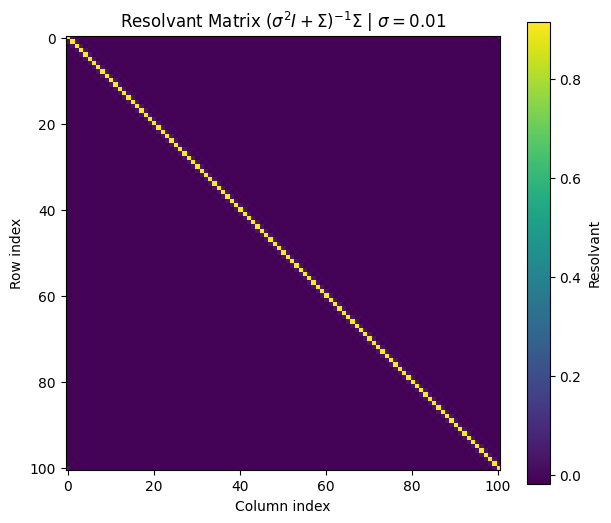

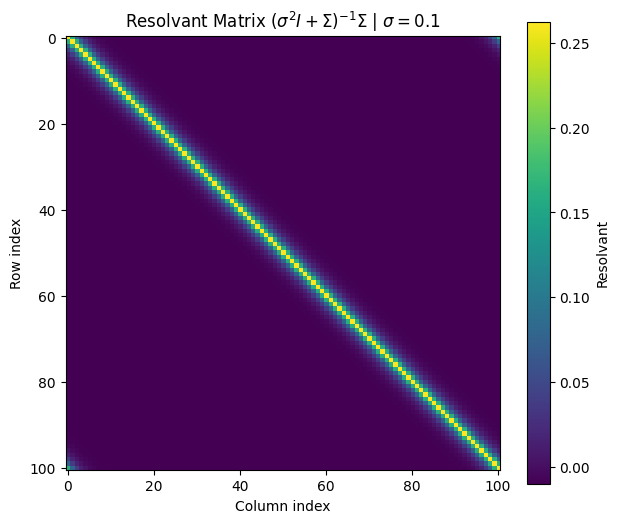

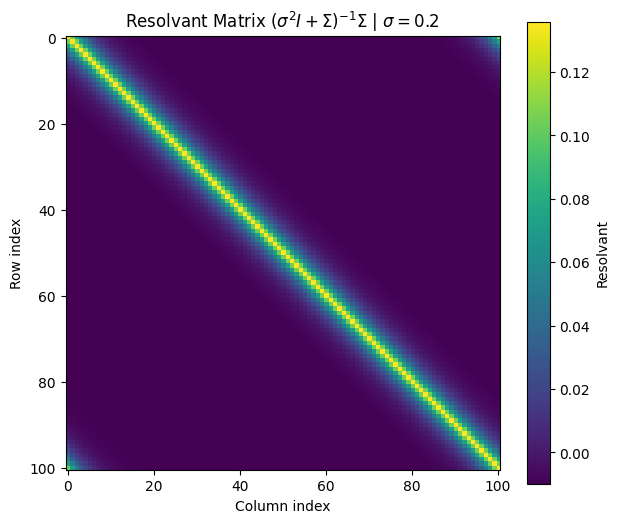

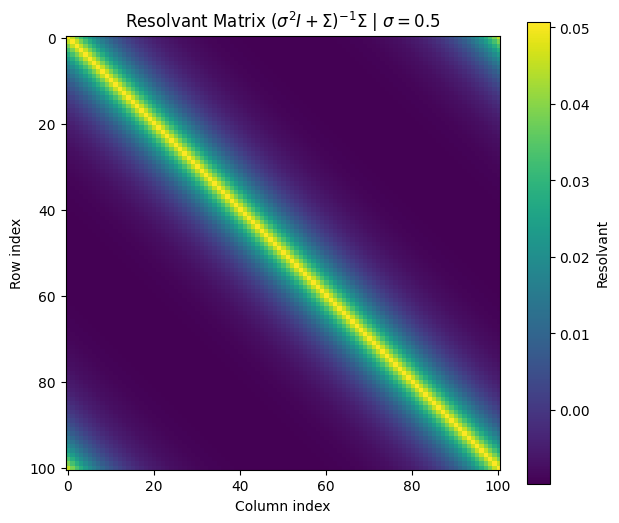

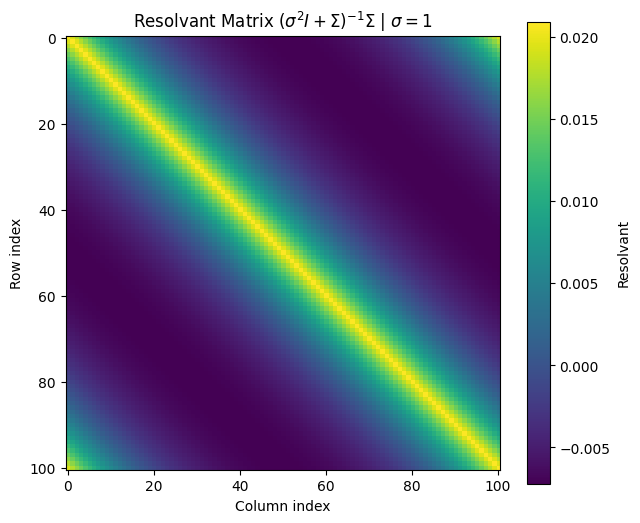

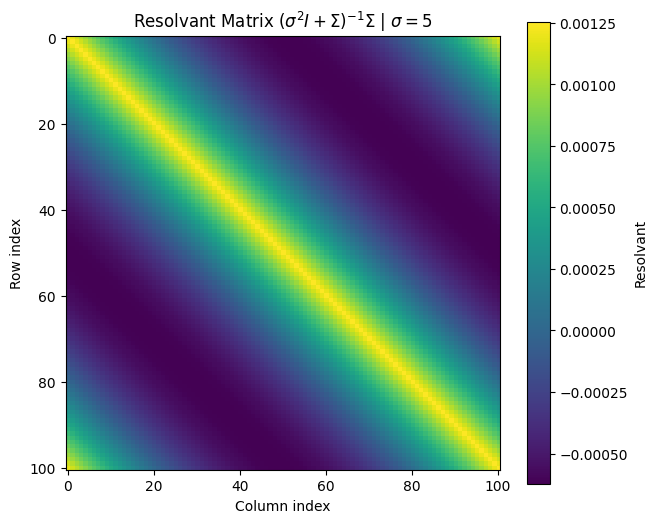

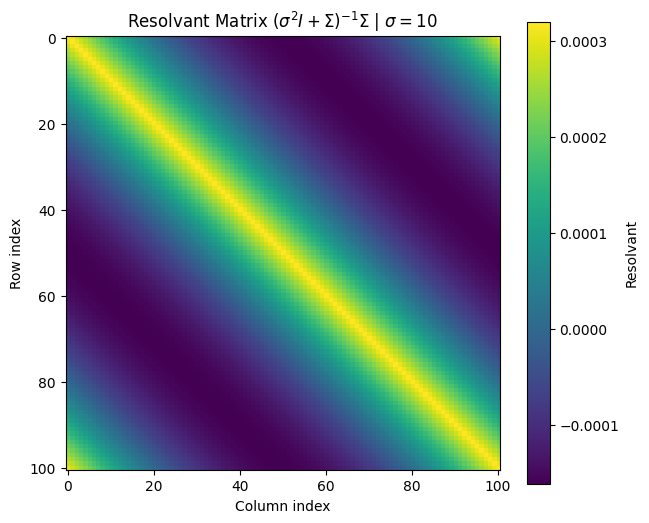

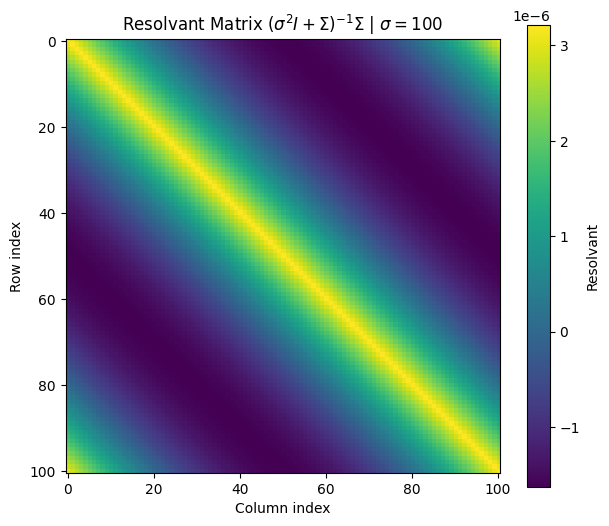

In [61]:
# Convert to covariance matrix using C = F* Λ F
# where F* is the conjugate transpose of F
sigma = 100
for sigma in [0.01, 0.1, 0.2, 0.5, 1, 5, 10, 100]:
    resolvant_matrix = F.conj() @ np.diag(lambda_vec / (lambda_vec + sigma**2)) @ F
    # Display the first few rows/columns of the covariance matrix
    plt.figure(figsize=(7, 6))
    plt.imshow(np.real(resolvant_matrix[:, :]), cmap='viridis')
    plt.colorbar(label='Resolvant')
    plt.title('Resolvant Matrix ($\sigma^2 I + \Sigma)^{-1} \Sigma$ | '+f'$\sigma = {sigma}$')
    plt.xlabel('Column index')
    plt.ylabel('Row index')
    plt.show()

### Toeplitz matrix case

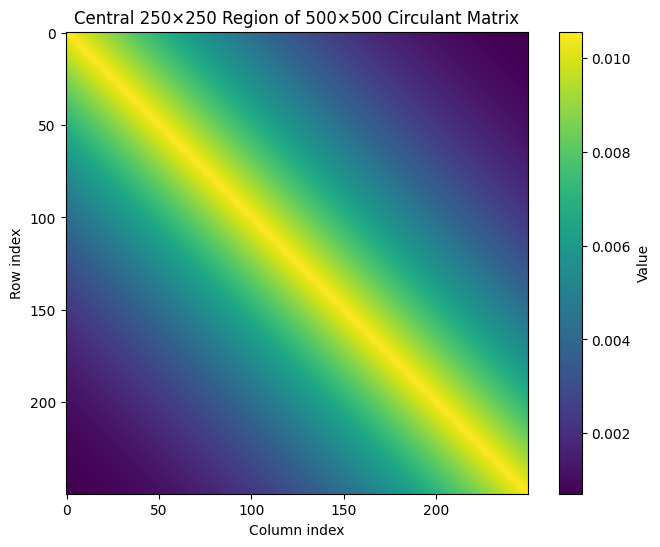

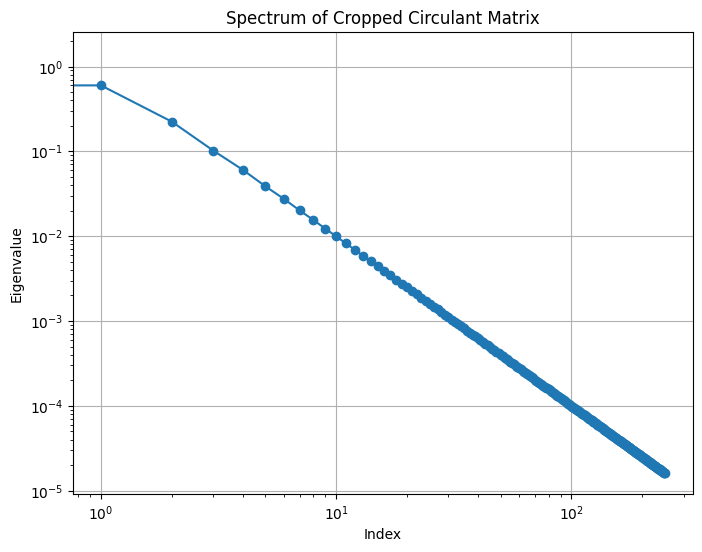

In [89]:
# Generate a much larger circulant matrix and crop the central part
N_large = 500  # Size of the large matrix
N_crop = 250    # Size of the cropped matrix

# Generate the first row of the circulant matrix with power law decay
def power_law(k, alpha=1.0):
    return 1.0 / k ** alpha

lambda_0 = 2.0
A0 = 1.0
# Create the first row for the circulant matrix
eigval_large = np.zeros(N_large)
for i in range(N_large):
    if i == 0:
        eigval_large[i] = lambda_0
    else:
        k = min(i, N_large - i)  # eigval symmetry
        eigval_large[i] = A0 * power_law(k, alpha=2)

# Create the circulant matrix using FFT
F_large = np.fft.fft(np.eye(N_large)) / np.sqrt(N_large)
# lambda_vec_large = np.fft.fft(first_row_large)
circulant_large = F_large.conj().T @ np.diag(eigval_large) @ F_large

# Crop the central part
start_idx = (N_large - N_crop) // 2
end_idx = start_idx + N_crop
circulant_cropped = circulant_large[start_idx:end_idx, start_idx:end_idx]

# Visualize the cropped matrix
plt.figure(figsize=(8, 6))
plt.imshow(np.real(circulant_cropped), cmap='viridis')
plt.colorbar(label='Value')
plt.title(f'Central {N_crop}×{N_crop} Region of {N_large}×{N_large} Circulant Matrix')
plt.xlabel('Column index')
plt.ylabel('Row index')
plt.show()

# Show eigenvalues of the cropped matrix
eigenvalues_cropped = np.linalg.eigvalsh(circulant_cropped)
plt.figure(figsize=(8, 6))
plt.loglog(eigenvalues_cropped[::-1], 'o-', label='Eigenvalues')
plt.title('Spectrum of Cropped Circulant Matrix')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


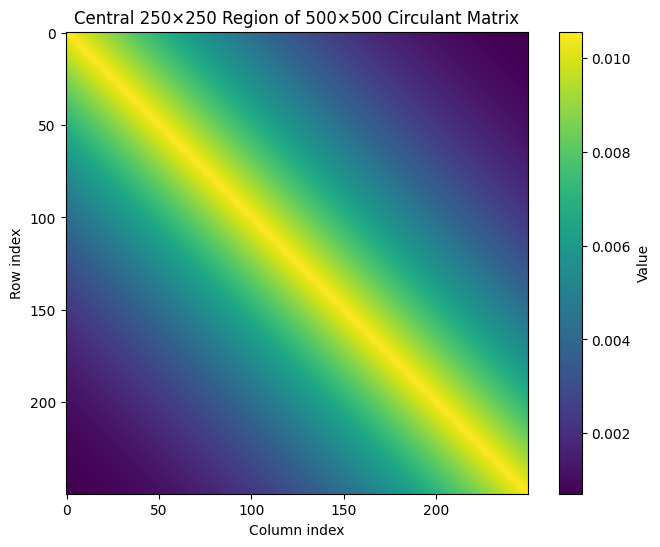

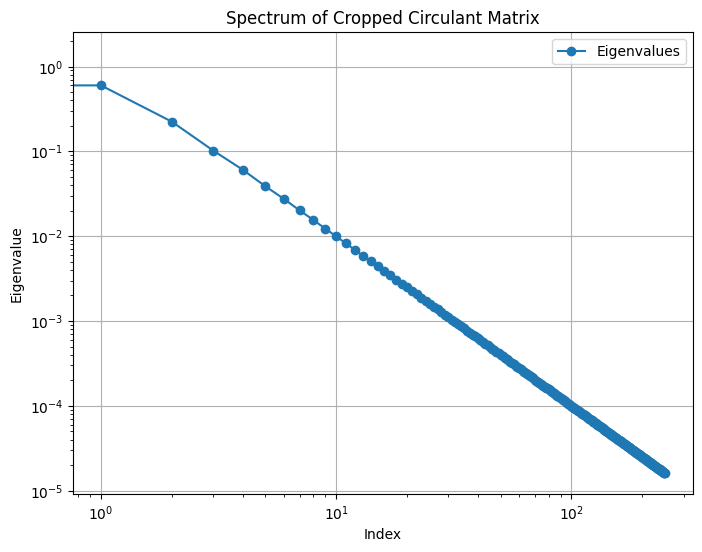

In [99]:
def generate_cropped_circulant(N_large=500, N_crop=250, lambda_0=2.0, A0=1.0, alpha=2.0, visualize=True):
    """
    Generate a cropped circulant matrix with power law decay in eigenvalues.
    
    Parameters:
    -----------
    N_large : int
        Size of the large circulant matrix before cropping
    N_crop : int
        Size of the cropped matrix
    lambda_0 : float
        Value for the first eigenvalue
    A0 : float
        Scaling factor for power law decay
    alpha : float
        Power law decay exponent
    visualize : bool
        Whether to visualize the matrix and its spectrum
        
    Returns:
    --------
    circulant_cropped : ndarray
        The cropped circulant matrix
    eigenvalues_cropped : ndarray
        Eigenvalues of the cropped matrix
    """
    # Generate the first row of the circulant matrix with power law decay
    def power_law(k, alpha=1.0):
        return 1.0 / k ** alpha

    # Create the first row for the circulant matrix
    eigval_large = np.zeros(N_large)
    for i in range(N_large):
        if i == 0:
            eigval_large[i] = lambda_0
        else:
            k = min(i, N_large - i)  # eigval symmetry
            eigval_large[i] = A0 * power_law(k, alpha=alpha)

    # Create the circulant matrix using FFT
    F_large = np.fft.fft(np.eye(N_large)) / np.sqrt(N_large)
    circulant_large = F_large.conj().T @ np.diag(eigval_large) @ F_large
    circulant_large = np.real(circulant_large)
    # Crop the central part
    start_idx = (N_large - N_crop) // 2
    end_idx = start_idx + N_crop
    circulant_cropped = circulant_large[start_idx:end_idx, start_idx:end_idx]
    
    # Calculate eigenvalues
    eigenvalues_cropped = np.linalg.eigvalsh(circulant_cropped)
    
    if visualize:
        # Visualize the cropped matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(np.real(circulant_cropped), cmap='viridis')
        plt.colorbar(label='Value')
        plt.title(f'Central {N_crop}×{N_crop} Region of {N_large}×{N_large} Circulant Matrix')
        plt.xlabel('Column index')
        plt.ylabel('Row index')
        plt.show()

        # Show eigenvalues of the cropped matrix
        plt.figure(figsize=(8, 6))
        plt.loglog(eigenvalues_cropped[::-1], 'o-', label='Eigenvalues')
        plt.title('Spectrum of Cropped Circulant Matrix')
        plt.xlabel('Index')
        plt.ylabel('Eigenvalue')
        plt.grid(True)
        plt.legend()
        plt.show()
    
    return circulant_cropped, eigenvalues_cropped

# Example usage
circulant_cropped, eigenvalues_cropped = generate_cropped_circulant(
    N_large=500, N_crop=250, lambda_0=2.0, A0=1.0, alpha=2.0
)


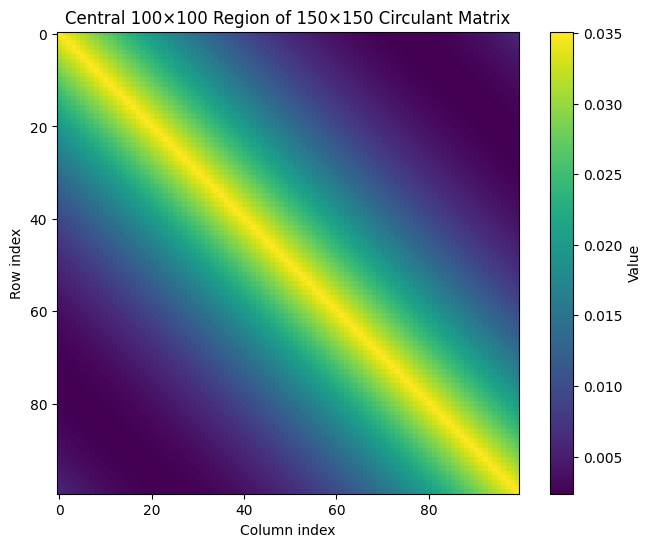

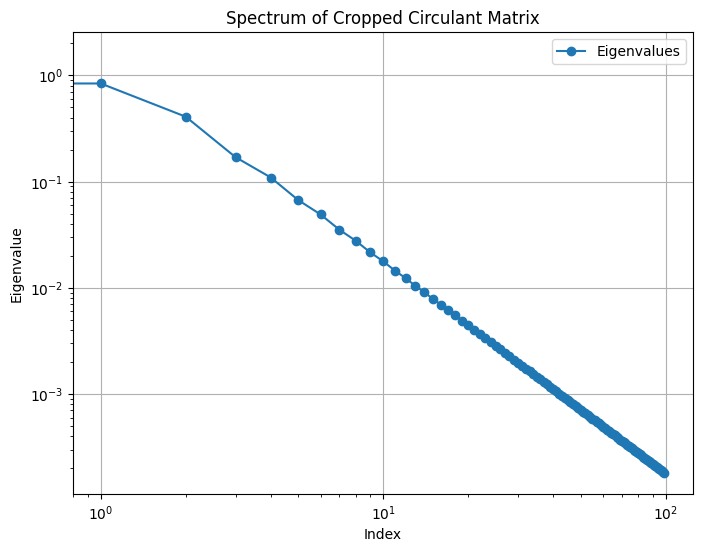

In [100]:

# Example usage
circulant_cropped, eigenvalues_cropped = generate_cropped_circulant(
    N_large=150, N_crop=100, lambda_0=2.0, A0=1.0, alpha=2.0, visualize=True
)

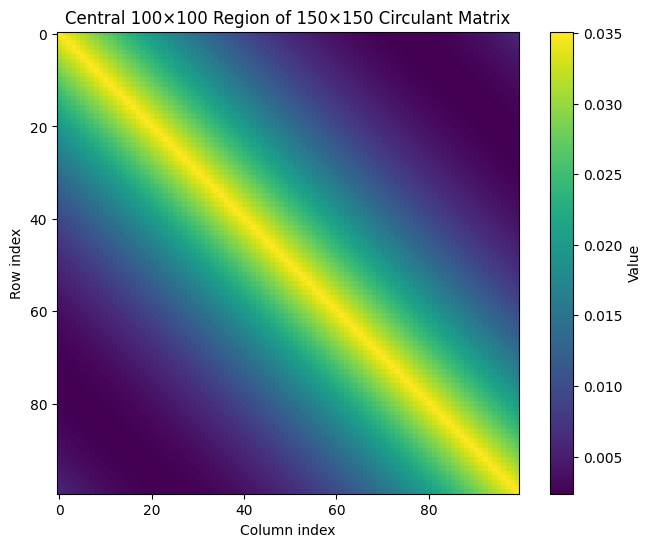

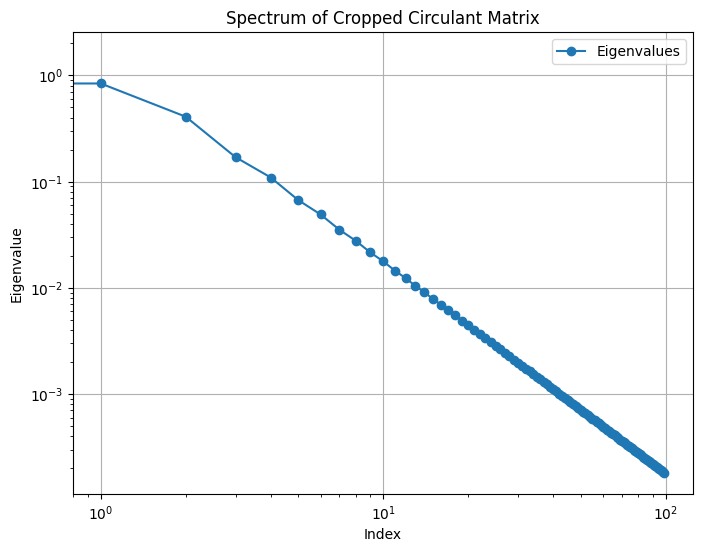

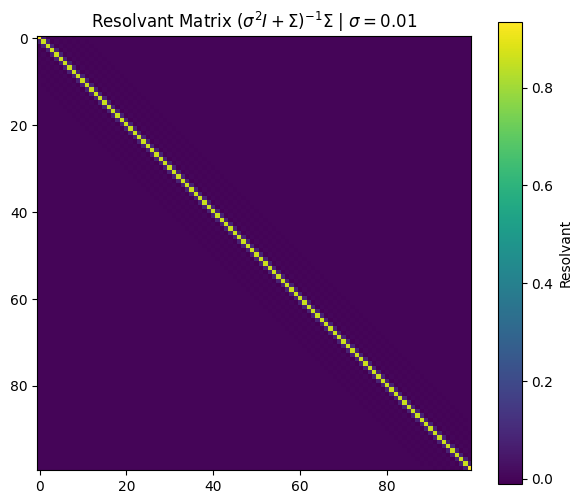

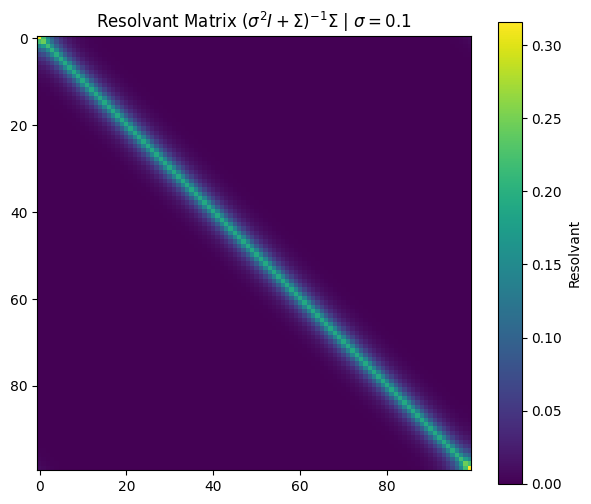

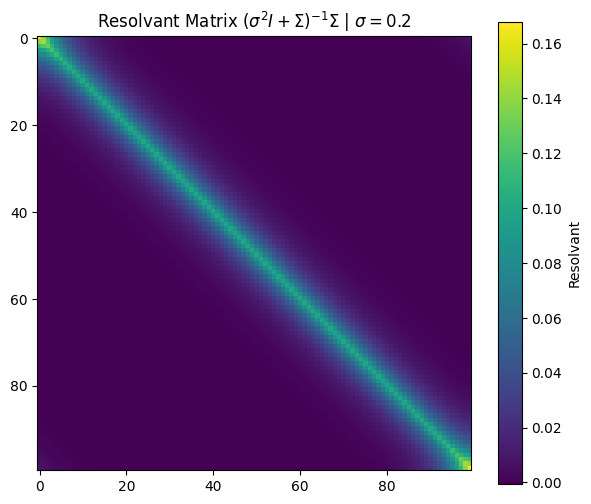

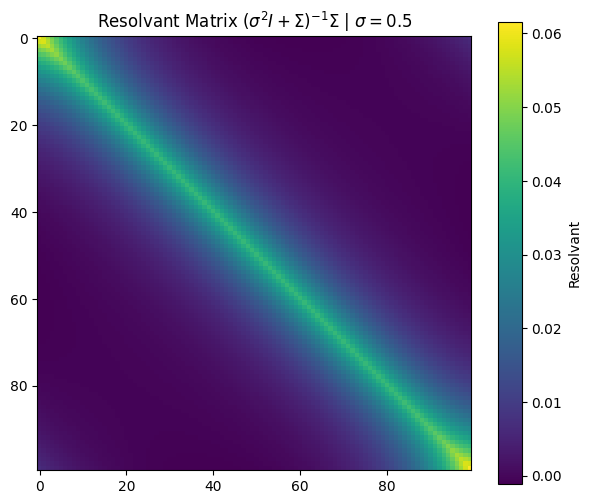

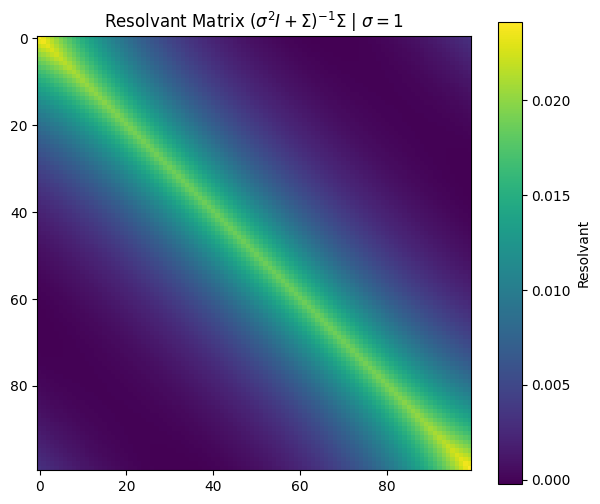

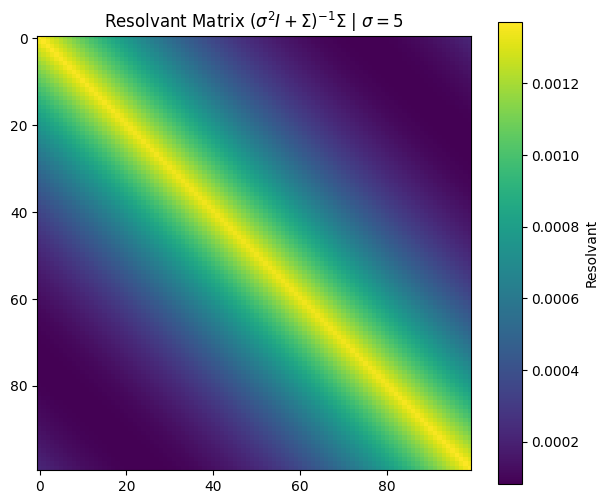

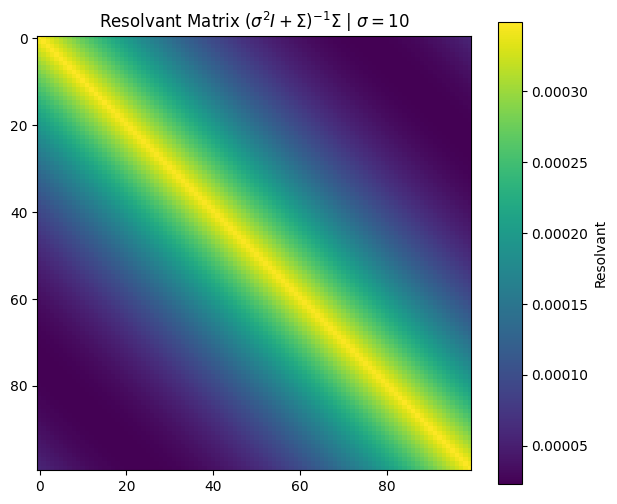

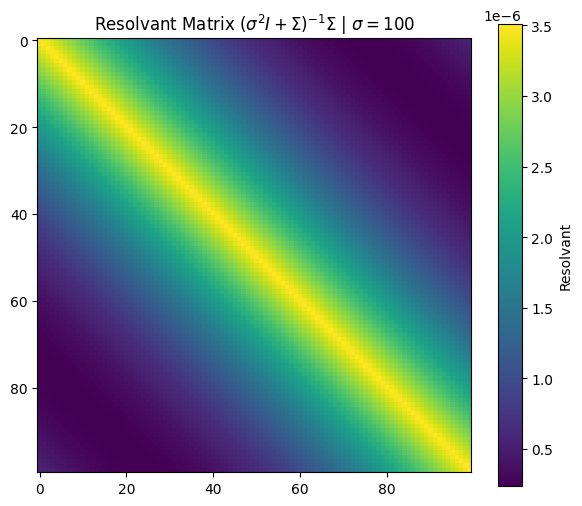

In [105]:

circulant_cropped, eigenvalues_cropped = generate_cropped_circulant(
    N_large=150, N_crop=100, lambda_0=2.0, A0=1.0, alpha=2.0, visualize=True
)
T_cov_mat = circulant_cropped

for sigma in [0.01, 0.1, 0.2, 0.5, 1, 5, 10, 100]:
    resolvant_matrix = np.linalg.inv(sigma**2 * np.eye(T_cov_mat.shape[0]) + T_cov_mat) @ T_cov_mat
    # Display the first few rows/columns of the covariance matrix
    plt.figure(figsize=(7, 6))
    plt.imshow(np.real(resolvant_matrix[:, :]), cmap='viridis')
    plt.colorbar(label='Resolvant')
    plt.title('Resolvant Matrix ($\sigma^2 I + \Sigma)^{-1} \Sigma$ | '+f'$\sigma = {sigma}$')

### 2d case

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_2511/2756375024.py:18: RuntimeWarning: divide by zero encountered in divide
  Pk = np.where(k_mag > epsilon, 1.0 / (k_mag**2), 0.0)


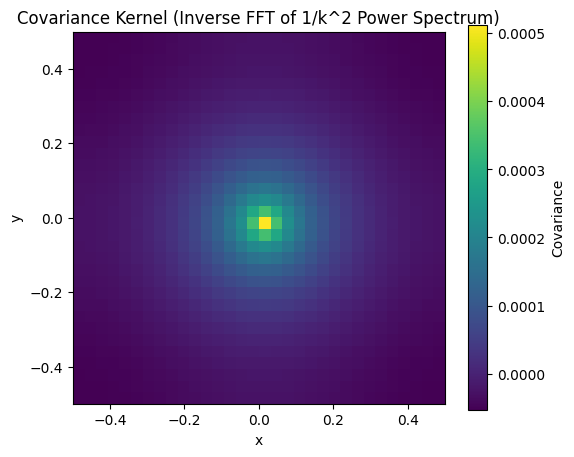

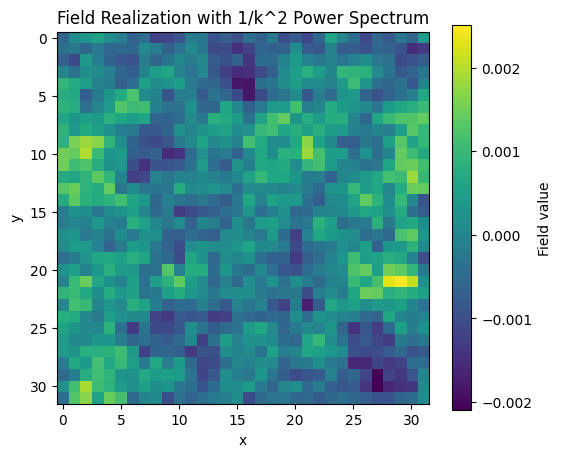

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
N = 32  # grid size (64x64 image)
L = 1.0  # physical size (can be scaled as needed)
dx = L / N

# Create frequency grids (using FFT frequencies for periodic BCs)
kx = np.fft.fftfreq(N, d=dx) * 2 * np.pi  # angular frequencies
ky = np.fft.fftfreq(N, d=dx) * 2 * np.pi
kxm, kym = np.meshgrid(kx, ky, indexing='ij')
k_mag = np.sqrt(kxm**2 + kym**2)

# Set up the power spectrum P(k) ~ 1/k^2 with regularization at k=0
# Regularize by setting P(0)=0 (or a small number) to avoid the singularity.
epsilon = 1e-10
Pk = np.where(k_mag > epsilon, 1.0 / (k_mag**2), 0.0)

# You might want to include a normalization factor here.
# For instance, factor = 1/(N**2) can be applied either in the FFT or after generating a field.

# Get the covariance kernel by inverse Fourier transforming Pk
# Note: Because the power spectrum is real and even, the resulting kernel will be real.
cov_kernel = np.fft.ifft2(Pk).real

# Shift the zero-frequency component to the center
cov_kernel = np.fft.fftshift(cov_kernel)

# Display the covariance kernel
plt.figure(figsize=(6, 5))
plt.imshow(cov_kernel, extent=[-L/2, L/2, -L/2, L/2], cmap='viridis')
plt.colorbar(label='Covariance')
plt.title('Covariance Kernel (Inverse FFT of 1/k^2 Power Spectrum)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Optionally: Construct a field realization based on this covariance structure.
# Generate white noise in Fourier space (with proper random phases).
noise = np.random.normal(size=(N, N)) + 1j*np.random.normal(size=(N, N))
# Multiply white noise by sqrt(Pk)
field_ft = noise * np.sqrt(Pk)
# Inverse FFT to get the field in real space.
field = np.fft.ifft2(field_ft).real

plt.figure(figsize=(6, 5))
plt.imshow(field, cmap='viridis')
plt.colorbar(label='Field value')
plt.title('Field Realization with 1/k^2 Power Spectrum')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_2511/1472115797.py:19: RuntimeWarning: divide by zero encountered in divide
  Pk = np.where(k_mag > epsilon, 1.0 / (k_mag**2), 0.0)


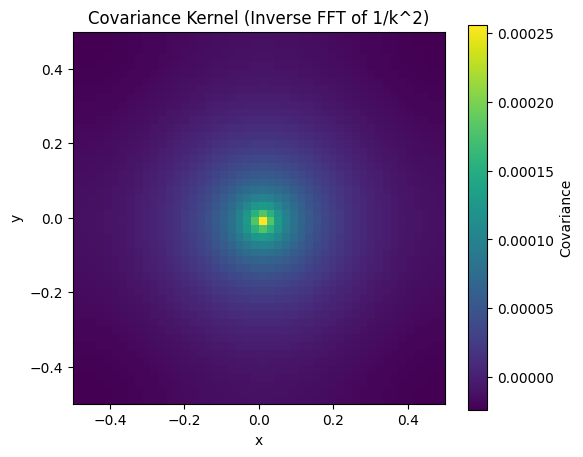

Covariance matrix shape: (2304, 2304)
Covariance matrix (first 5 rows):
 [[2.55535910e-04 1.79966933e-04 1.27931838e-04 1.02018618e-04
  8.15283036e-05]
 [1.79966933e-04 2.55535910e-04 1.79966933e-04 1.27931838e-04
  1.02018618e-04]
 [1.27931838e-04 1.79966933e-04 2.55535910e-04 1.79966933e-04
  1.27931838e-04]
 [1.02018618e-04 1.27931838e-04 1.79966933e-04 2.55535910e-04
  1.79966933e-04]
 [8.15283036e-05 1.02018618e-04 1.27931838e-04 1.79966933e-04
  2.55535910e-04]]


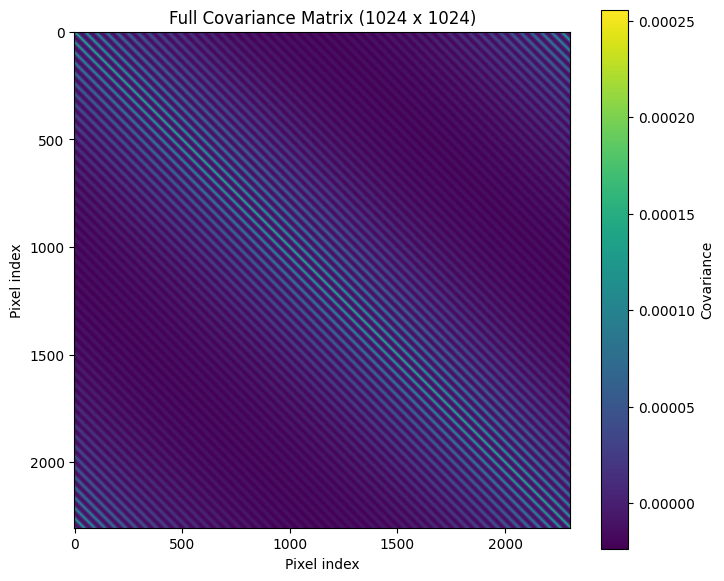

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 48          # grid size (32x32 image)
L = 1.0         # physical size of the grid (arbitrary units)
dx = L / N      # grid spacing

# Step 1: Compute the Covariance Kernel from the 1/k^2 Power Spectrum

# Define the Fourier space (angular frequency) grid for periodic boundary conditions.
kx = np.fft.fftfreq(N, d=dx) * 2 * np.pi  # angular frequencies for x
ky = np.fft.fftfreq(N, d=dx) * 2 * np.pi  # angular frequencies for y
kxm, kym = np.meshgrid(kx, ky, indexing='ij')
k_mag = np.sqrt(kxm**2 + kym**2)

# Regularize the power spectrum to avoid the singularity at k=0.
epsilon = 1e-10
Pk = np.where(k_mag > epsilon, 1.0 / (k_mag**2), 0.0)

# Inverse FFT to obtain the covariance kernel in real space.
cov_kernel = np.fft.ifft2(Pk).real

# Shift the kernel so that its center corresponds to zero separation.
cov_kernel = np.fft.fftshift(cov_kernel)

# Optional: visualize the kernel.
plt.figure(figsize=(6, 5))
plt.imshow(cov_kernel, extent=[-L/2, L/2, -L/2, L/2], cmap='viridis')
plt.colorbar(label='Covariance')
plt.title('Covariance Kernel (Inverse FFT of 1/k^2)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Step 2: Build the Full (1024x1024) Covariance Matrix

# Generate a list of (x,y) positions on the grid. We will assign pixel centers.
# We'll index the grid from 0 to N-1 along each direction.
x_vals = np.linspace(0, L, N, endpoint=False)
y_vals = np.linspace(0, L, N, endpoint=False)
x_grid, y_grid = np.meshgrid(x_vals, y_vals, indexing='ij')
positions = np.stack([x_grid.ravel(), y_grid.ravel()], axis=1)  # shape (N^2, 2)

# Create the full covariance matrix
# For pixels i and j, we need the periodic separation. That is, for each coordinate, if
# the absolute difference is more than L/2, we subtract L accordingly.
def periodic_distance(dx, L):
    # Adjust for periodic boundaries: if |dx| > L/2, shift by L.
    return (dx + L/2) % L - L/2

# Preallocate the covariance matrix.
M = positions.shape[0]
cov_matrix = np.zeros((M, M))

# Create a lookup table from separation (in grid units) to kernel value.
# The kernel was computed on a grid corresponding to separations:
# x: from -L/2 to L/2 in steps of dx, and similarly for y.
grid_vals = np.arange(N)  # indices from 0 to N-1
# Construct the corresponding spatial coordinates for the kernel indexing.
# Because we used fftshift, the grid positions are:
kernel_coords = np.linspace(-L/2, L/2 - dx, N)
# Create 2D arrays for kernel coordinate mapping.
kernel_x, kernel_y = np.meshgrid(kernel_coords, kernel_coords, indexing='ij')

# For each pair of pixels, compute the periodic differences and assign the covariance.
# Since N^2=1024 is not too huge, we can use a double loop. Alternatively, vectorized routines
# could be used.
for idx in range(M):
    x1, y1 = positions[idx]
    for jdx in range(M):
        x2, y2 = positions[jdx]
        # Compute periodic differences in x and y.
        dx_val = periodic_distance(x2 - x1, L)
        dy_val = periodic_distance(y2 - y1, L)
        # Find the nearest indices in the kernel grid.
        # Because our kernel grid is uniformly spaced with spacing dx, we can compute the index.
        ix = int(np.round((dx_val + L/2) / dx)) % N
        iy = int(np.round((dy_val + L/2) / dx)) % N  # using dx for y as well since grid is uniform
        cov_matrix[idx, jdx] = cov_kernel[ix, iy]

# Display some information about the resulting covariance matrix.
print("Covariance matrix shape:", cov_matrix.shape)
print("Covariance matrix (first 5 rows):\n", cov_matrix[:5, :5])

# Optionally, visualize the covariance matrix as an image.
plt.figure(figsize=(8, 7))
plt.imshow(cov_matrix, cmap='viridis')
plt.title('Full Covariance Matrix (1024 x 1024)')
plt.xlabel('Pixel index')
plt.ylabel('Pixel index')
plt.colorbar(label='Covariance')
plt.show()

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_2511/2713774389.py:17: RuntimeWarning: divide by zero encountered in divide
  Pk = np.where(k_mag > epsilon, 1.0 / (k_mag**2), 0.0)


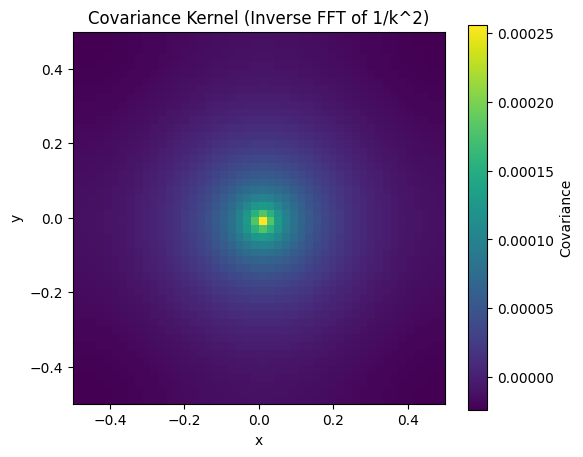

Covariance matrix shape: (2304, 2304)
Covariance matrix (first 5 rows):
 [[2.55535910e-04 1.79966933e-04 1.27931838e-04 1.02018618e-04
  8.15283036e-05]
 [1.79966933e-04 2.55535910e-04 1.79966933e-04 1.27931838e-04
  1.02018618e-04]
 [1.27931838e-04 1.79966933e-04 2.55535910e-04 1.79966933e-04
  1.27931838e-04]
 [1.02018618e-04 1.27931838e-04 1.79966933e-04 2.55535910e-04
  1.79966933e-04]
 [8.15283036e-05 1.02018618e-04 1.27931838e-04 1.79966933e-04
  2.55535910e-04]]


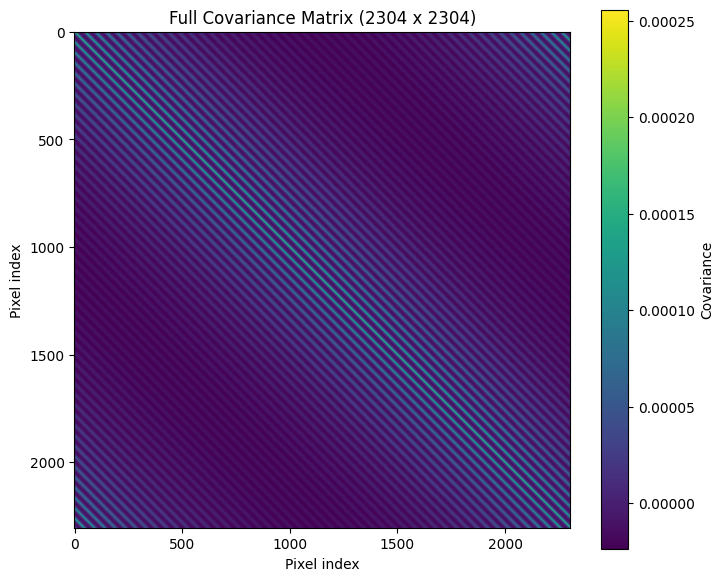

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 48          # grid size (32x32 image)
L = 1.0         # physical size of the grid (arbitrary units)
dx = L / N      # grid spacing

# Compute the Fourier-space grid (with angular frequencies).
kx = np.fft.fftfreq(N, d=dx) * 2 * np.pi
ky = np.fft.fftfreq(N, d=dx) * 2 * np.pi
kxm, kym = np.meshgrid(kx, ky, indexing='ij')
k_mag = np.sqrt(kxm**2 + kym**2)

# Regularize the power spectrum to avoid the singularity at k=0.
epsilon = 1e-10
Pk = np.where(k_mag > epsilon, 1.0 / (k_mag**2), 0.0)

# Compute the covariance kernel using the inverse FFT of the power spectrum.
cov_kernel = np.fft.ifft2(Pk).real
cov_kernel = np.fft.fftshift(cov_kernel)

# For visualization (optional)
plt.figure(figsize=(6, 5))
plt.imshow(cov_kernel, extent=[-L/2, L/2, -L/2, L/2], cmap='viridis')
plt.colorbar(label='Covariance')
plt.title('Covariance Kernel (Inverse FFT of 1/k^2)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Generate grid positions (pixel centers) for the 32x32 grid.
x_vals = np.linspace(0, L, N, endpoint=False)
y_vals = np.linspace(0, L, N, endpoint=False)
x_grid, y_grid = np.meshgrid(x_vals, y_vals, indexing='ij')
positions = np.stack([x_grid.ravel(), y_grid.ravel()], axis=1)  # shape (M, 2) where M=N^2

M = positions.shape[0]  # total number of pixels

# Define vectorized periodic distance adjustment
def periodic_distance_vector(d, L):
    """Adjust differences for periodic boundary conditions."""
    return (d + L/2) % L - L/2
# Compute all pairwise differences along x and y using broadcasting.
# Differences has shape (M, M, 2)
diffs = positions[:, np.newaxis, :] - positions[np.newaxis, :, :]
# Apply periodic adjustment on both coordinates.
diffs[..., 0] = periodic_distance_vector(diffs[..., 0], L)
diffs[..., 1] = periodic_distance_vector(diffs[..., 1], L)
# Map the continuous differences to discrete indices on the kernel grid.
# The kernel grid spans from -L/2 to L/2-dx with spacing dx.
ix = np.rint((diffs[..., 0] + L/2) / dx).astype(int) % N
iy = np.rint((diffs[..., 1] + L/2) / dx).astype(int) % N
# Build the full covariance matrix by directly indexing into cov_kernel.
cov_matrix = cov_kernel[ix, iy]
# Verify shape and display a slice of the covariance matrix.
print("Covariance matrix shape:", cov_matrix.shape)
print("Covariance matrix (first 5 rows):\n", cov_matrix[:5, :5])

# Optionally, visualize the full covariance matrix.
plt.figure(figsize=(8, 7))
plt.imshow(cov_matrix, cmap='viridis')
plt.title(f'Full Covariance Matrix ({N**2} x {N**2})')
plt.xlabel('Pixel index')
plt.ylabel('Pixel index')
plt.colorbar(label='Covariance')
plt.show()

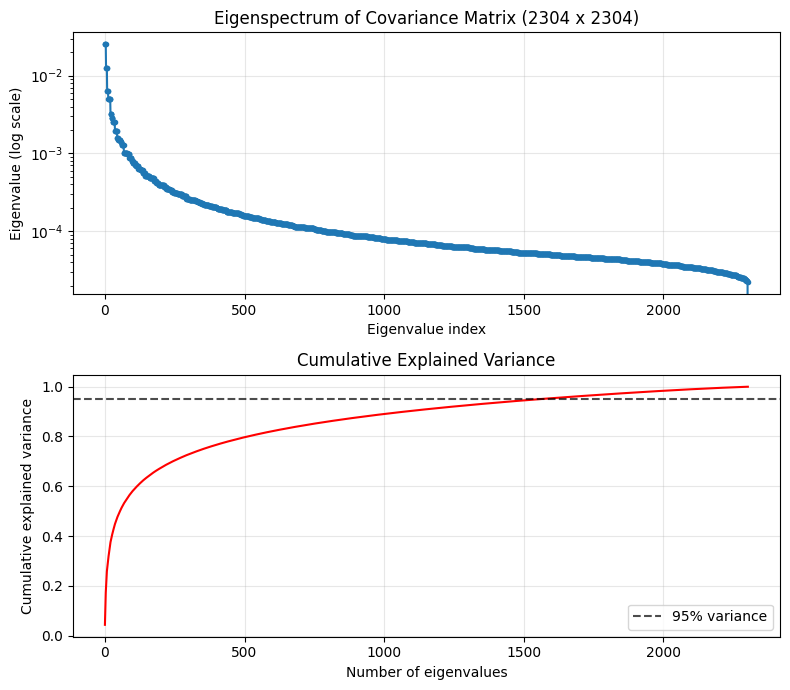

In [113]:
# Compute and visualize the eigenspectrum of the covariance matrix
eigenvalues = np.linalg.eigvalsh(cov_matrix)
eigenvalues = np.sort(eigenvalues)[::-1]  # Sort in descending order

plt.figure(figsize=(8, 7))
# Plot the eigenspectrum
plt.subplot(2, 1, 1)
plt.semilogy(eigenvalues, 'o-', markersize=3)
plt.title(f'Eigenspectrum of Covariance Matrix ({N**2} x {N**2})')
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue (log scale)')
plt.grid(True, alpha=0.3)

# Plot the cumulative explained variance
plt.subplot(2, 1, 2)
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(cumulative_variance, 'r-')
plt.axhline(y=0.95, color='k', linestyle='--', alpha=0.7, label='95% variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of eigenvalues')
plt.ylabel('Cumulative explained variance')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

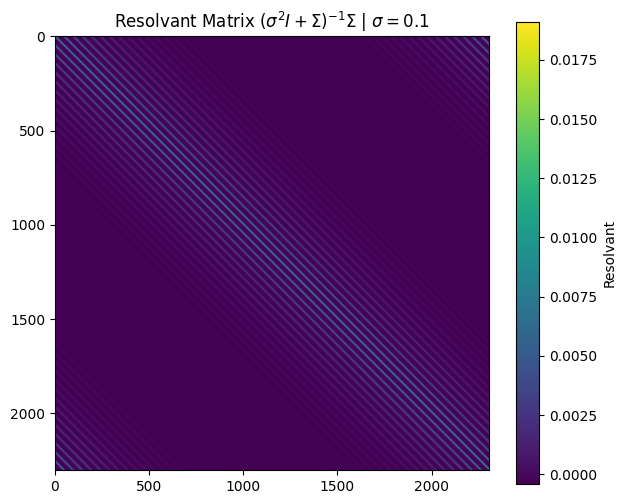

In [118]:
# for sigma in [0.01, 0.1, 0.2, 0.5, 1, 5, 10, 100]:
sigma = 0.1
resolvant_matrix = np.linalg.inv(sigma**2 * np.eye(cov_matrix.shape[0]) + cov_matrix) @ cov_matrix
# Display the first few rows/columns of the covariance matrix
plt.figure(figsize=(7, 6))
plt.imshow(np.real(resolvant_matrix[:, :]), cmap='viridis')
plt.colorbar(label='Resolvant')
plt.title('Resolvant Matrix ($\sigma^2 I + \Sigma)^{-1} \Sigma$ | '+f'$\sigma = {sigma}$')
plt.show()

Linear index for coordinates (35, 35) in 48×48 array: 1715


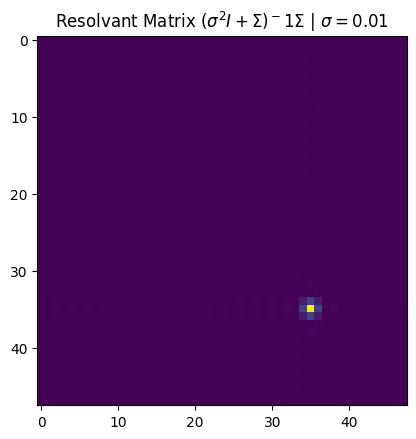

Linear index for coordinates (35, 35) in 48×48 array: 1715


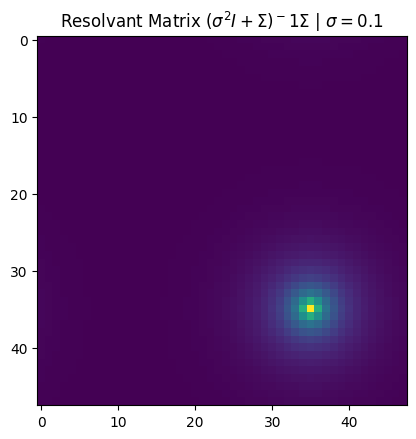

Linear index for coordinates (35, 35) in 48×48 array: 1715


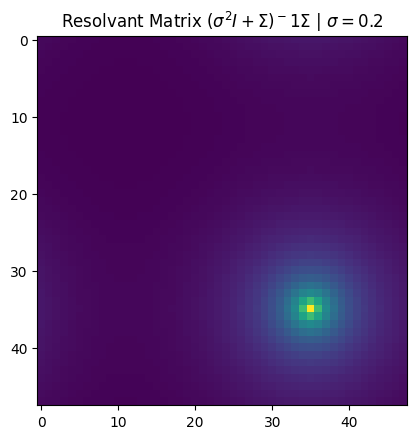

Linear index for coordinates (35, 35) in 48×48 array: 1715


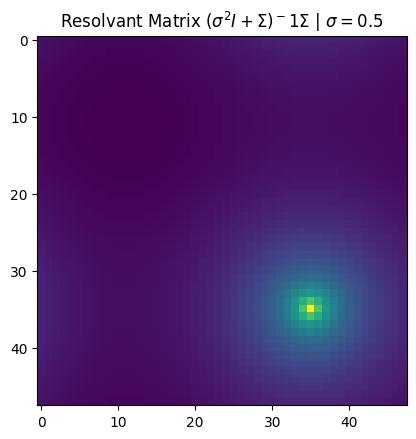

Linear index for coordinates (35, 35) in 48×48 array: 1715


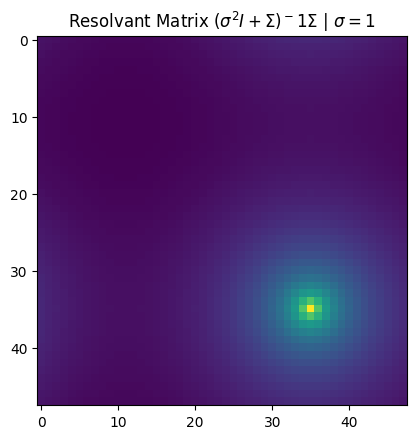

Linear index for coordinates (35, 35) in 48×48 array: 1715


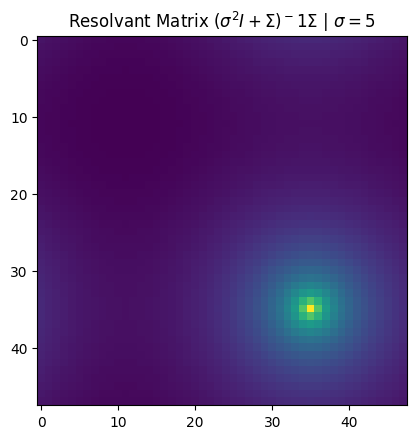

Linear index for coordinates (35, 35) in 48×48 array: 1715


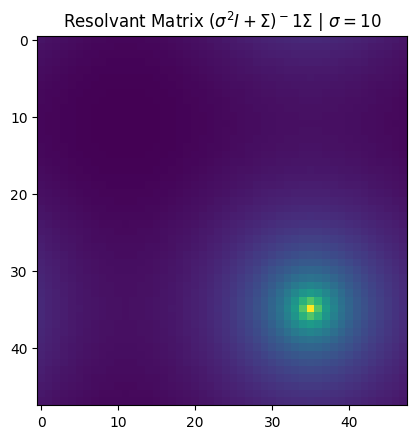

Linear index for coordinates (35, 35) in 48×48 array: 1715


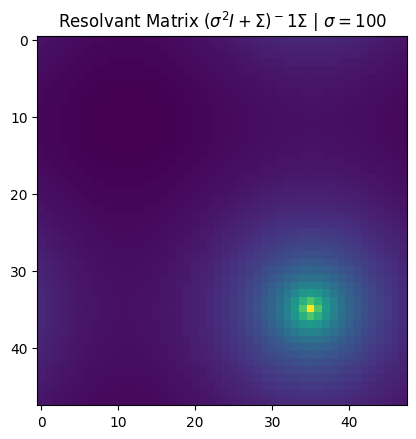

In [124]:
sigma = 100
for sigma in [0.01, 0.1, 0.2, 0.5, 1, 5, 10, 100]:
    resolvant_matrix = np.linalg.inv(sigma**2 * np.eye(cov_matrix.shape[0]) + cov_matrix) @ cov_matrix
    # Convert 2D coordinates to linear index using numpy's ravel_multi_index
    i, j = 35, 35  # Example coordinates
    idx = np.ravel_multi_index((i, j), (N, N))
    print(f"Linear index for coordinates ({i}, {j}) in {N}×{N} array: {idx}")
    plt.imshow(resolvant_matrix[idx, :].reshape(N, N))
    plt.title(f'Resolvant Matrix ($\sigma^2 I + \Sigma)^{-1} \Sigma$ | '+f'$\sigma = {sigma}$')
    plt.show()

### Counter Example flat spectrum

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_2511/2810341451.py:99: RuntimeWarning: divide by zero encountered in power
  np.where((k_mag > epsilon) & (k_mag < 150.0), 1.0 / (k_mag**-0.5), 0.0)


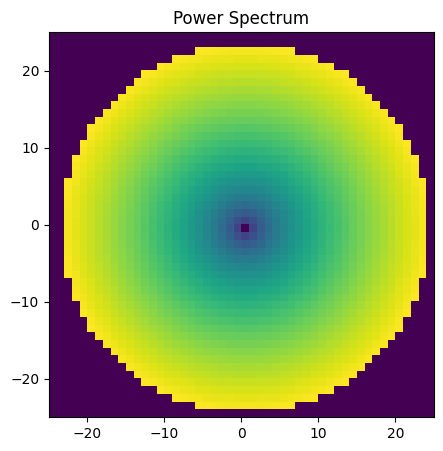

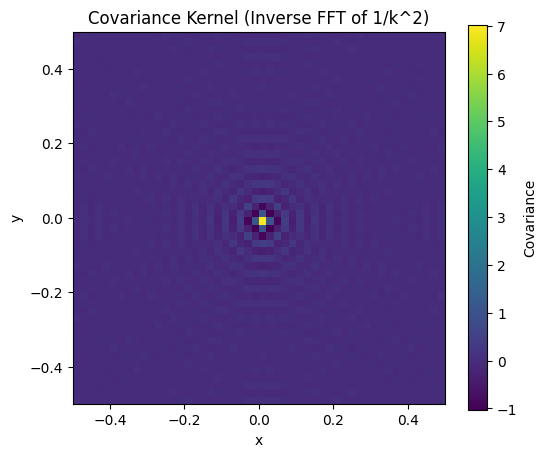

Covariance matrix shape: (2500, 2500)
Covariance matrix (first 5 rows):
 [[ 7.00939129  1.06999899 -0.90348958  0.40996793 -0.36366262]
 [ 1.06999899  7.00939129  1.06999899 -0.90348958  0.40996793]
 [-0.90348958  1.06999899  7.00939129  1.06999899 -0.90348958]
 [ 0.40996793 -0.90348958  1.06999899  7.00939129  1.06999899]
 [-0.36366262  0.40996793 -0.90348958  1.06999899  7.00939129]]


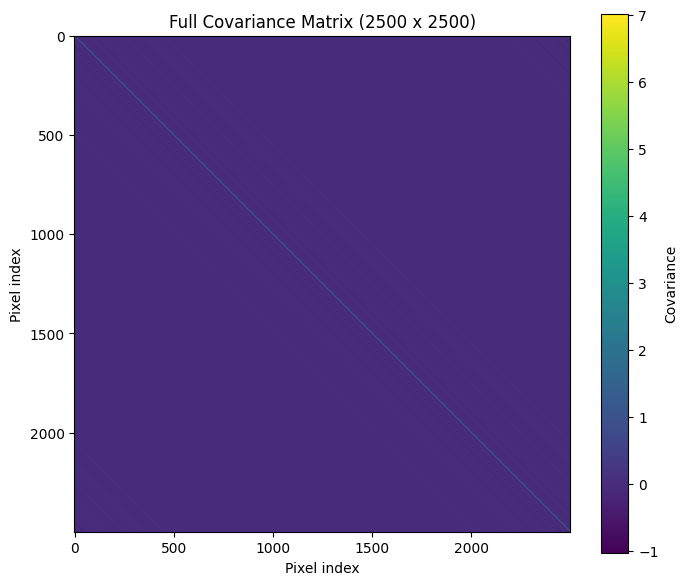

In [171]:
import numpy as np
import matplotlib.pyplot as plt

def create_power_spectrum(N, L, power_func=None):
    """Create a power spectrum with a k^-0.1 dependence or custom power function."""
    dx = L / N
    # Compute the Fourier-space grid (with angular frequencies)
    kx = np.fft.fftfreq(N, d=dx) * 2 * np.pi
    ky = np.fft.fftfreq(N, d=dx) * 2 * np.pi
    kxm, kym = np.meshgrid(kx, ky, indexing='ij')
    k_mag = np.sqrt(kxm**2 + kym**2)
    
    # Regularize the power spectrum to avoid the singularity at k=0
    
    if power_func is None:
        # Default power spectrum with k^-0.1 dependence
        Pk = np.where((k_mag > epsilon) & (k_mag < 150.0), 1.0 / (k_mag**0.1), 0.0)
    else:
        # Use the provided power function
        Pk = power_func(k_mag, )
    
    return Pk, k_mag

def compute_covariance_kernel(Pk):
    """Compute the covariance kernel from the power spectrum."""
    cov_kernel = np.fft.ifft2(Pk).real
    cov_kernel = np.fft.fftshift(cov_kernel)
    return cov_kernel

def periodic_distance_vector(d, L):
    """Adjust differences for periodic boundary conditions."""
    return (d + L/2) % L - L/2

def build_covariance_matrix(N, L, cov_kernel):
    """Build the full covariance matrix using the covariance kernel."""
    dx = L / N
    # Generate grid positions (pixel centers)
    x_vals = np.linspace(0, L, N, endpoint=False)
    y_vals = np.linspace(0, L, N, endpoint=False)
    x_grid, y_grid = np.meshgrid(x_vals, y_vals, indexing='ij')
    positions = np.stack([x_grid.ravel(), y_grid.ravel()], axis=1)
    
    M = positions.shape[0]  # total number of pixels
    
    # Compute all pairwise differences along x and y using broadcasting
    diffs = positions[:, np.newaxis, :] - positions[np.newaxis, :, :]
    # Apply periodic adjustment on both coordinates
    diffs[..., 0] = periodic_distance_vector(diffs[..., 0], L)
    diffs[..., 1] = periodic_distance_vector(diffs[..., 1], L)
    
    # Map the continuous differences to discrete indices on the kernel grid
    ix = np.rint((diffs[..., 0] + L/2) / dx).astype(int) % N
    iy = np.rint((diffs[..., 1] + L/2) / dx).astype(int) % N
    
    # Build the full covariance matrix by directly indexing into cov_kernel
    cov_matrix = cov_kernel[ix, iy]
    
    return cov_matrix

def plot_covariance_kernel(cov_kernel, L):
    """Plot the covariance kernel."""
    plt.figure(figsize=(6, 5))
    plt.imshow(cov_kernel, extent=[-L/2, L/2, -L/2, L/2], cmap='viridis')
    plt.colorbar(label='Covariance')
    plt.title('Covariance Kernel (Inverse FFT of 1/k^2)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def plot_power_spectrum(Pk, N):
    """Plot the power spectrum."""
    # k_mag
    plt.figure(figsize=(6, 5))
    # plt.loglog(k_mag, Pk, label='Power Spectrum')
    # shift the power spectrum to the center
    Pk_shifted = np.fft.fftshift(Pk)
    plt.imshow(Pk_shifted, cmap='viridis', extent=[-N/2, N/2, -N/2, N/2])
    plt.title('Power Spectrum')
    # plt.xlabel('k')
    # plt.ylabel('P(k)')
    plt.show()

def plot_covariance_matrix(cov_matrix, N):
    """Plot the full covariance matrix."""
    plt.figure(figsize=(8, 7))
    plt.imshow(cov_matrix, cmap='viridis')
    plt.title(f'Full Covariance Matrix ({N**2} x {N**2})')
    plt.xlabel('Pixel index')
    plt.ylabel('Pixel index')
    plt.colorbar(label='Covariance')
    plt.show()

# Main execution
# Parameters
N = 50          # grid size
L = 1.0         # physical size of the grid (arbitrary units)
epsilon = 1E-1
power_func = lambda k_mag:\
    np.where((k_mag > epsilon) & (k_mag < 150.0), 1.0 / (k_mag**-0.5), 0.0)
# Create power spectrum
Pk, k_mag = create_power_spectrum(N, L, power_func=power_func)
# Compute covariance kernel
cov_kernel = compute_covariance_kernel(Pk)
# Plot covariance kernel
plot_power_spectrum(Pk, N) #k_mag
plot_covariance_kernel(cov_kernel, L)
# Build full covariance matrix
cov_matrix = build_covariance_matrix(N, L, cov_kernel)
# Print information about the covariance matrix
print("Covariance matrix shape:", cov_matrix.shape)
print("Covariance matrix (first 5 rows):\n", cov_matrix[:5, :5])
# Plot covariance matrix
plot_covariance_matrix(cov_matrix, N)

Linear index for coordinates (35, 35) in 50×50 array: 1785


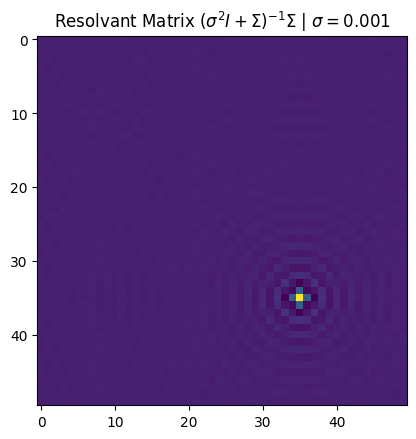

Linear index for coordinates (35, 35) in 50×50 array: 1785


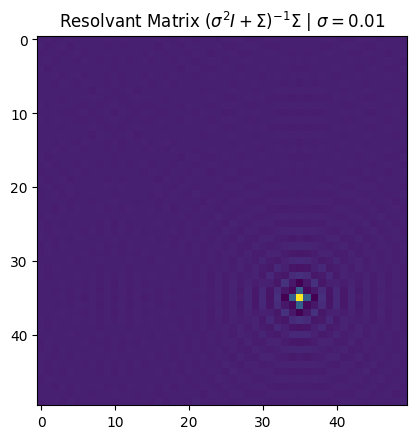

Linear index for coordinates (35, 35) in 50×50 array: 1785


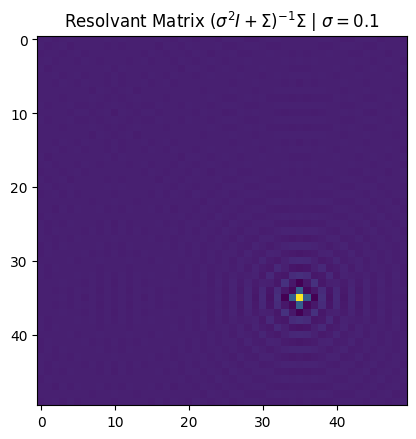

Linear index for coordinates (35, 35) in 50×50 array: 1785


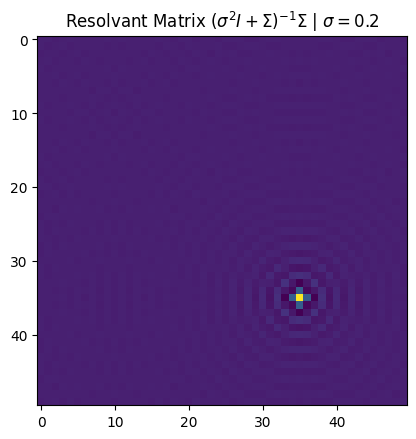

Linear index for coordinates (35, 35) in 50×50 array: 1785


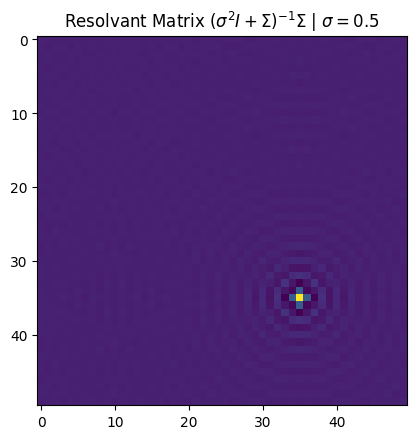

Linear index for coordinates (35, 35) in 50×50 array: 1785


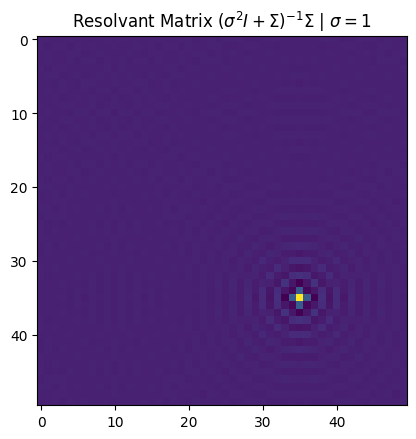

Linear index for coordinates (35, 35) in 50×50 array: 1785


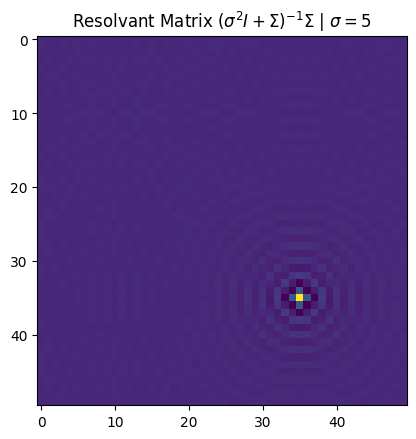

Linear index for coordinates (35, 35) in 50×50 array: 1785


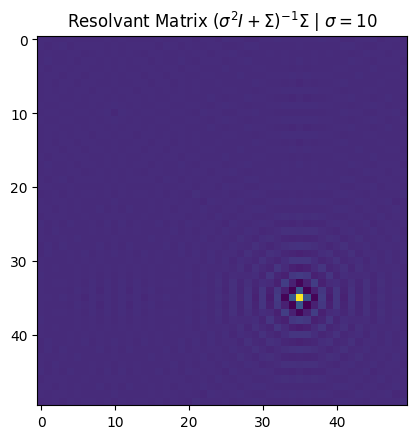

Linear index for coordinates (35, 35) in 50×50 array: 1785


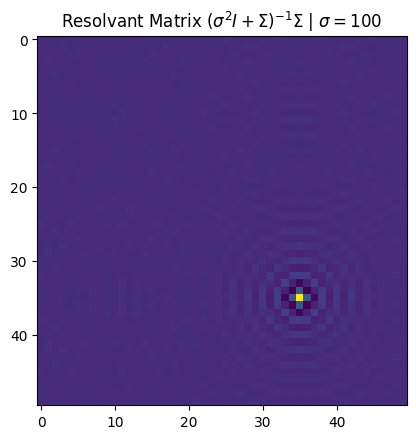

In [165]:
sigma = 100
for sigma in [0.001, 0.01, 0.1, 0.2, 0.5, 1, 5, 10, 100]:
    resolvant_matrix = np.linalg.inv(sigma**2 * np.eye(cov_matrix.shape[0]) + cov_matrix) @ cov_matrix
    # Convert 2D coordinates to linear index using numpy's ravel_multi_index
    i, j = 35, 35  # Example coordinates
    idx = np.ravel_multi_index((i, j), (N, N))
    print(f"Linear index for coordinates ({i}, {j}) in {N}×{N} array: {idx}")
    plt.imshow(resolvant_matrix[idx, :].reshape(N, N))
    plt.title('Resolvant Matrix ($\sigma^2 I + \Sigma)^{-1} \Sigma$ | '+f'$\sigma = {sigma}$')
    plt.show()

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_2511/1198888046.py:7: RuntimeWarning: divide by zero encountered in power
  np.where((k_mag > epsilon) & (k_mag < 150.0), 1.0 / (k_mag**-2), 0.0)


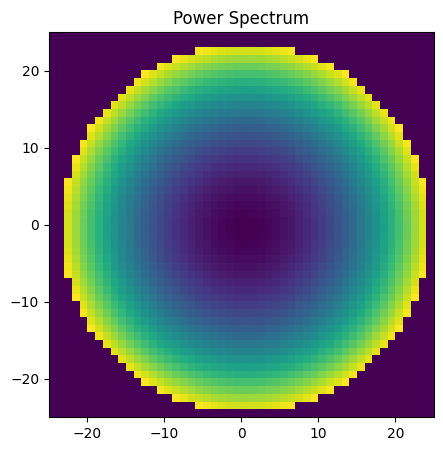

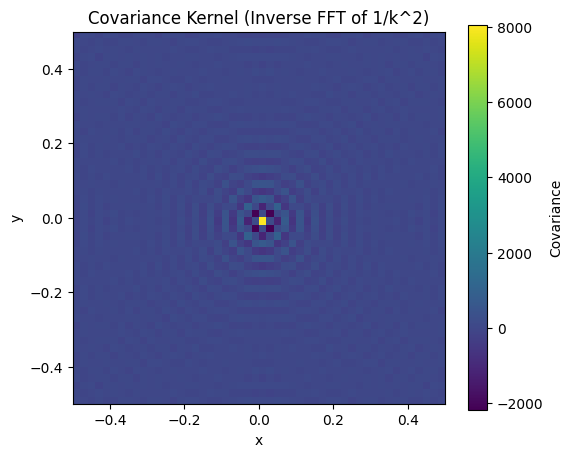

Covariance matrix shape: (2500, 2500)
Covariance matrix (first 5 rows):
 [[ 8043.36438545   148.32493593 -1111.38056719   728.94980677
   -601.59932276]
 [  148.32493593  8043.36438545   148.32493593 -1111.38056719
    728.94980677]
 [-1111.38056719   148.32493593  8043.36438545   148.32493593
  -1111.38056719]
 [  728.94980677 -1111.38056719   148.32493593  8043.36438545
    148.32493593]
 [ -601.59932276   728.94980677 -1111.38056719   148.32493593
   8043.36438545]]


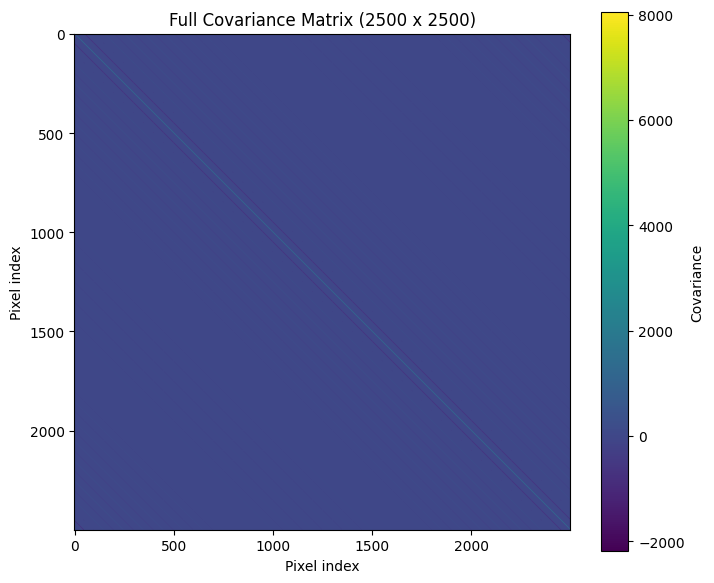

Linear index for coordinates (35, 35) in 50×50 array: 1785


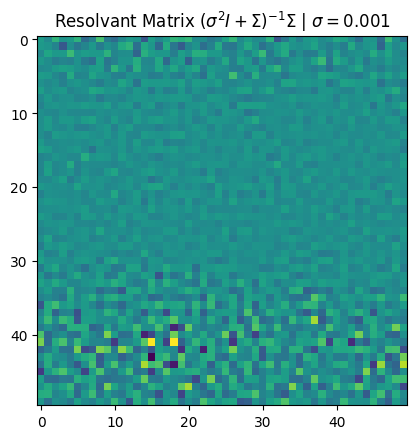

Linear index for coordinates (35, 35) in 50×50 array: 1785


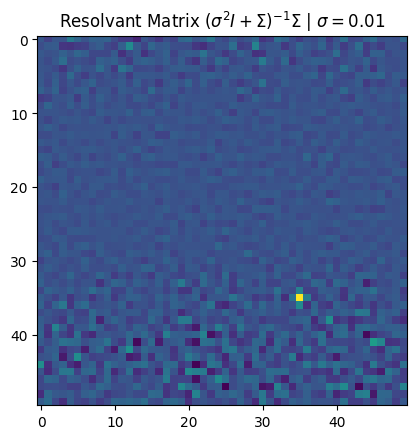

Linear index for coordinates (35, 35) in 50×50 array: 1785


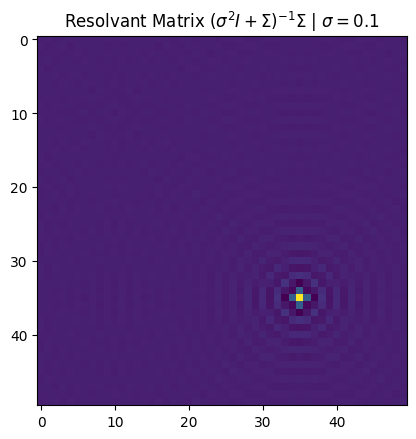

Linear index for coordinates (35, 35) in 50×50 array: 1785


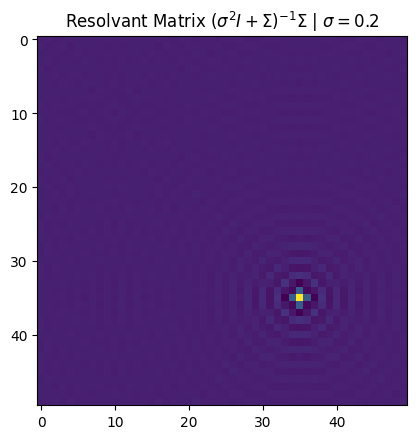

Linear index for coordinates (35, 35) in 50×50 array: 1785


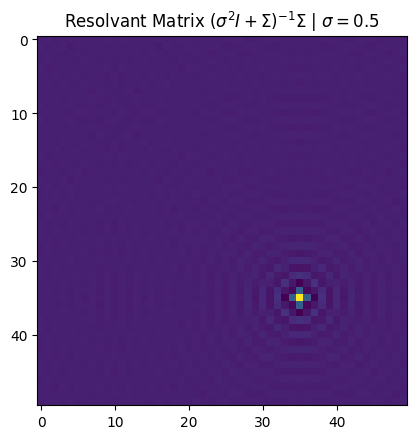

Linear index for coordinates (35, 35) in 50×50 array: 1785


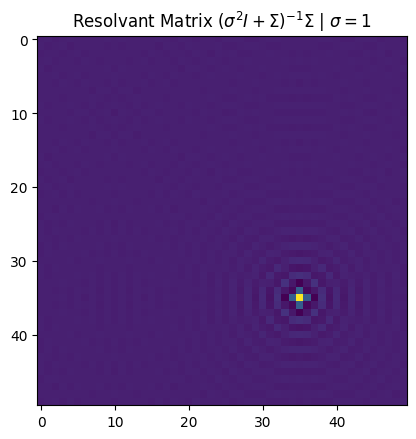

Linear index for coordinates (35, 35) in 50×50 array: 1785


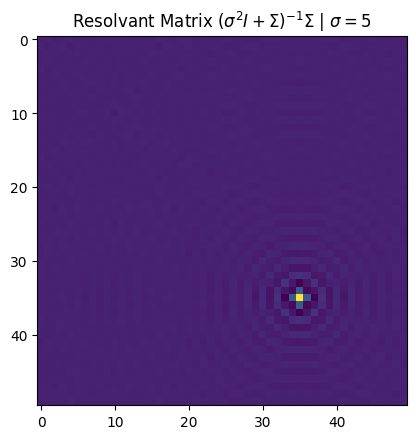

Linear index for coordinates (35, 35) in 50×50 array: 1785


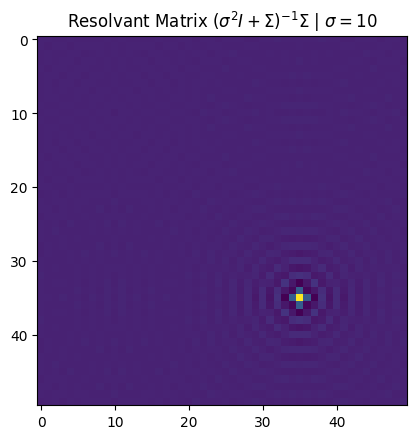

Linear index for coordinates (35, 35) in 50×50 array: 1785


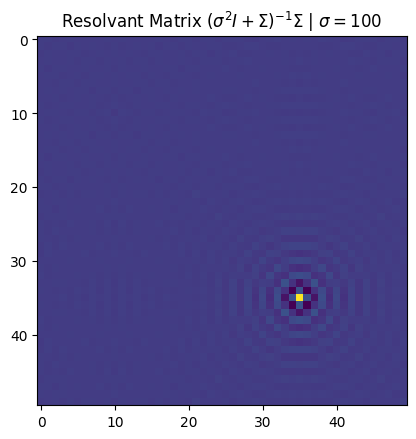

In [172]:

# Main execution
# Parameters
N = 50          # grid size
L = 1.0         # physical size of the grid (arbitrary units)
epsilon = 1E-1
power_func = lambda k_mag:\
    np.where((k_mag > epsilon) & (k_mag < 150.0), 1.0 / (k_mag**-2), 0.0)
# Create power spectrum
Pk, k_mag = create_power_spectrum(N, L, power_func=power_func)
# Compute covariance kernel
cov_kernel = compute_covariance_kernel(Pk)
# Plot covariance kernel
plot_power_spectrum(Pk, N) #k_mag
plot_covariance_kernel(cov_kernel, L)
# Build full covariance matrix
cov_matrix = build_covariance_matrix(N, L, cov_kernel)
# Print information about the covariance matrix
print("Covariance matrix shape:", cov_matrix.shape)
print("Covariance matrix (first 5 rows):\n", cov_matrix[:5, :5])
# Plot covariance matrix
plot_covariance_matrix(cov_matrix, N)

sigma = 100
for sigma in [0.001, 0.01, 0.1, 0.2, 0.5, 1, 5, 10, 100]:
    resolvant_matrix = np.linalg.inv(sigma**2 * np.eye(cov_matrix.shape[0]) + cov_matrix) @ cov_matrix
    # Convert 2D coordinates to linear index using numpy's ravel_multi_index
    i, j = 35, 35  # Example coordinates
    idx = np.ravel_multi_index((i, j), (N, N))
    print(f"Linear index for coordinates ({i}, {j}) in {N}×{N} array: {idx}")
    plt.imshow(resolvant_matrix[idx, :].reshape(N, N))
    plt.title('Resolvant Matrix ($\sigma^2 I + \Sigma)^{-1} \Sigma$ | '+f'$\sigma = {sigma}$')
    plt.show()

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_2511/1198888046.py:7: RuntimeWarning: divide by zero encountered in power
  np.where((k_mag > epsilon) & (k_mag < 150.0), 1.0 / (k_mag**-2), 0.0)


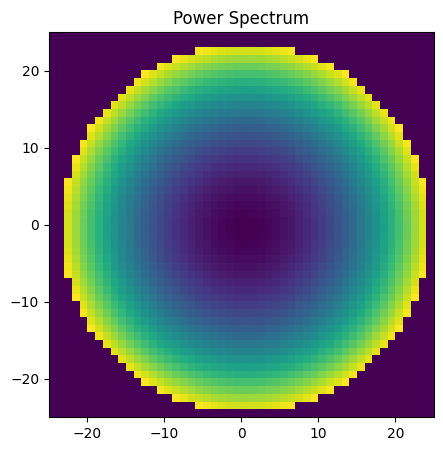

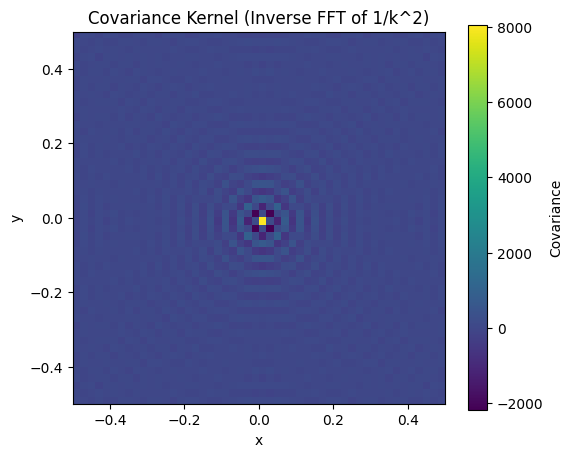

Covariance matrix shape: (2500, 2500)
Covariance matrix (first 5 rows):
 [[ 8043.36438545   148.32493593 -1111.38056719   728.94980677
   -601.59932276]
 [  148.32493593  8043.36438545   148.32493593 -1111.38056719
    728.94980677]
 [-1111.38056719   148.32493593  8043.36438545   148.32493593
  -1111.38056719]
 [  728.94980677 -1111.38056719   148.32493593  8043.36438545
    148.32493593]
 [ -601.59932276   728.94980677 -1111.38056719   148.32493593
   8043.36438545]]


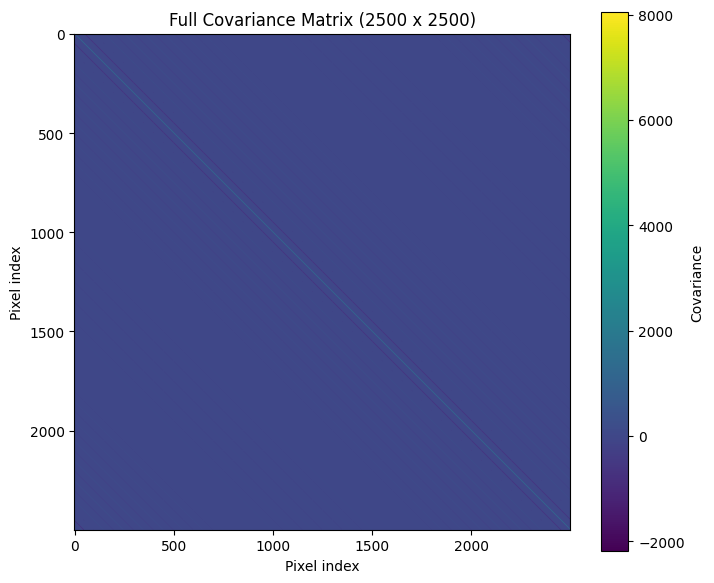

Linear index for coordinates (35, 35) in 50×50 array: 1785


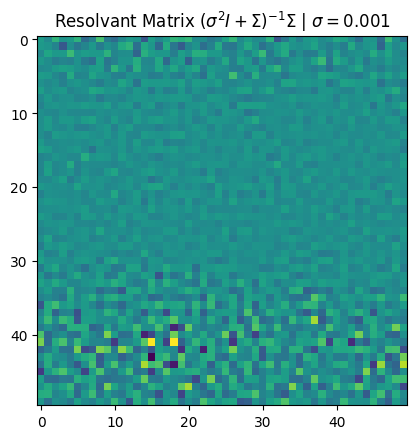

Linear index for coordinates (35, 35) in 50×50 array: 1785


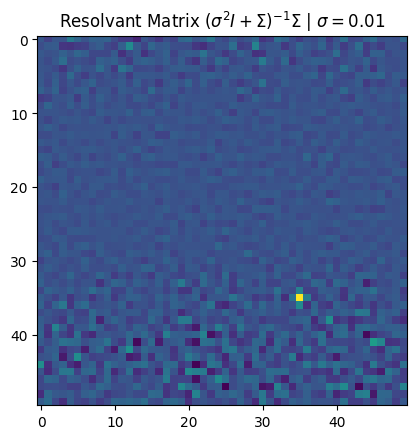

Linear index for coordinates (35, 35) in 50×50 array: 1785


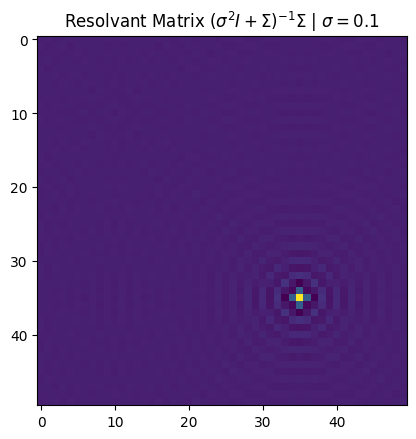

Linear index for coordinates (35, 35) in 50×50 array: 1785


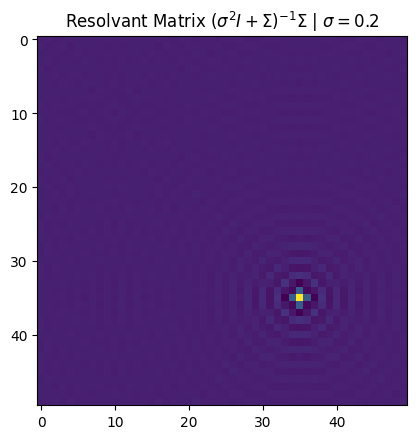

Linear index for coordinates (35, 35) in 50×50 array: 1785


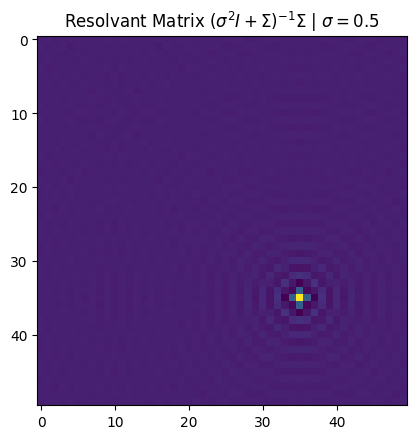

Linear index for coordinates (35, 35) in 50×50 array: 1785


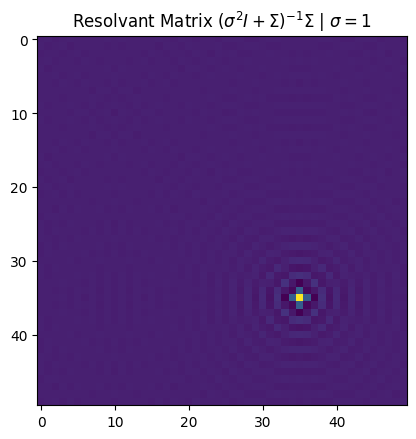

Linear index for coordinates (35, 35) in 50×50 array: 1785


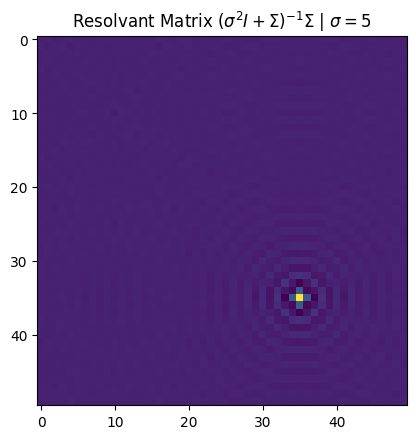

Linear index for coordinates (35, 35) in 50×50 array: 1785


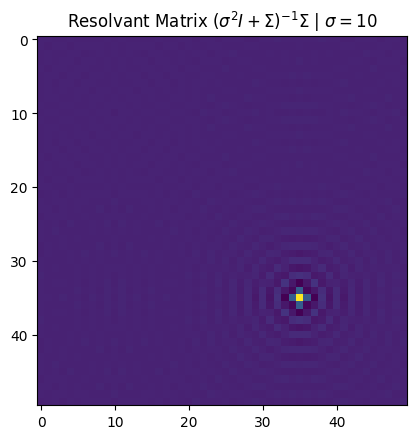

Linear index for coordinates (35, 35) in 50×50 array: 1785


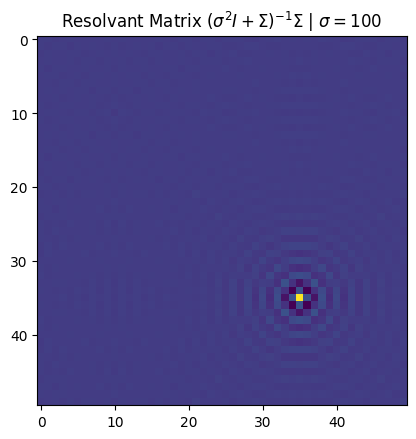

In [173]:

# Main execution
# Parameters
N = 50          # grid size
L = 1.0         # physical size of the grid (arbitrary units)
epsilon = 1E-1
power_func = lambda k_mag:\
    np.where((k_mag > epsilon) & (k_mag < 150.0), 1.0 / (k_mag**-2), 0.0)
# Create power spectrum
Pk, k_mag = create_power_spectrum(N, L, power_func=power_func)
# Compute covariance kernel
cov_kernel = compute_covariance_kernel(Pk)
# Plot covariance kernel
plot_power_spectrum(Pk, N) #k_mag
plot_covariance_kernel(cov_kernel, L)
# Build full covariance matrix
cov_matrix = build_covariance_matrix(N, L, cov_kernel)
# Print information about the covariance matrix
print("Covariance matrix shape:", cov_matrix.shape)
print("Covariance matrix (first 5 rows):\n", cov_matrix[:5, :5])
# Plot covariance matrix
plot_covariance_matrix(cov_matrix, N)

sigma = 100
for sigma in [0.001, 0.01, 0.1, 0.2, 0.5, 1, 5, 10, 100]:
    resolvant_matrix = np.linalg.inv(sigma**2 * np.eye(cov_matrix.shape[0]) + cov_matrix) @ cov_matrix
    # Convert 2D coordinates to linear index using numpy's ravel_multi_index
    i, j = 35, 35  # Example coordinates
    idx = np.ravel_multi_index((i, j), (N, N))
    print(f"Linear index for coordinates ({i}, {j}) in {N}×{N} array: {idx}")
    plt.imshow(resolvant_matrix[idx, :].reshape(N, N))
    plt.title('Resolvant Matrix ($\sigma^2 I + \Sigma)^{-1} \Sigma$ | '+f'$\sigma = {sigma}$')
    plt.show()